# KNN

In [1]:
import numpy as np
import pandas as pd
import g20_functions as g20
import ds_functions as ds
# KNN uses MinMax scaling, 8-best features and removes outliers using isolation forest 0.05
data = g20.outlierRemovalData(
    g20.fs_k_best(g20.scaleData(g20.balanceData(g20.loadHeartGFR(),
                                                     dataset='Heart',
                                                graphs = False)['OverSample'])['MinMax'],
                       dataset="Heart",k=8),
    dataset='Heart')['Isolation Forest 0.05']
X, y, labels = g20.xySplit(data, target='DEATH_EVENT')


SelectKBest k = 8, 8 features selected
(402, 8)
(402, 1)
(385, 8)
(385, 1)
(365, 8)
(365, 1)
(401, 8)
(401, 1)
(386, 8)
(386, 1)
(367, 8)
(367, 1)
(383, 8)
(383, 1)
(383, 8)
(383, 1)
(383, 8)
(383, 1)



-> 5-fold CrossVal for Heart:
Best results: 1 neighbors, chebyshev metric, 0.90 accuracy
Best results: 1 neighbors, chebyshev metric, 0.91 accuracy
Best results: 1 neighbors, euclidean metric, 0.90 accuracy
Best results: 1 neighbors, manhattan metric, 0.90 accuracy
Best results: 1 neighbors, euclidean metric, 0.88 accuracy


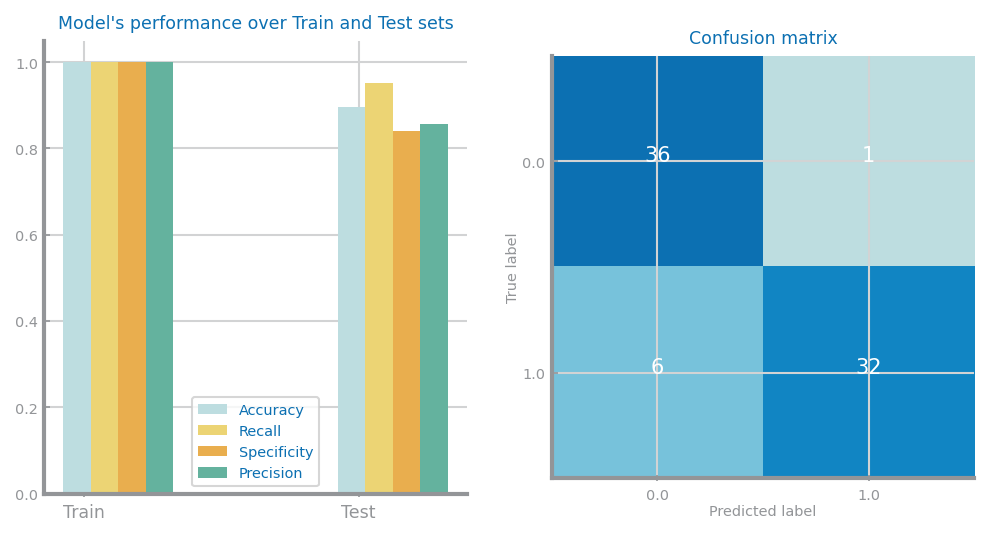

{'manhattan': array([0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01]), 'euclidean': array([0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]), 'chebyshev': array([0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])}


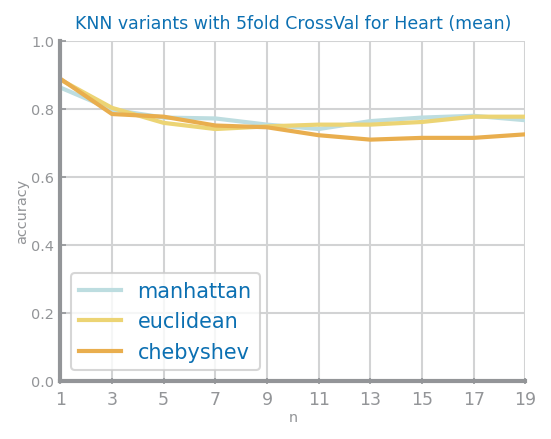

Best mean results: 1 neighbors, chebyshev metric, 0.89 accuracy

-> 5-fold CrossVal:
Best results: 1 neighbors, chebyshev metric, 0.90 accuracy
Best results: 1 neighbors, chebyshev metric, 0.91 accuracy
Best results: 1 neighbors, euclidean metric, 0.90 accuracy
Best results: 1 neighbors, manhattan metric, 0.90 accuracy
Best results: 1 neighbors, euclidean metric, 0.88 accuracy


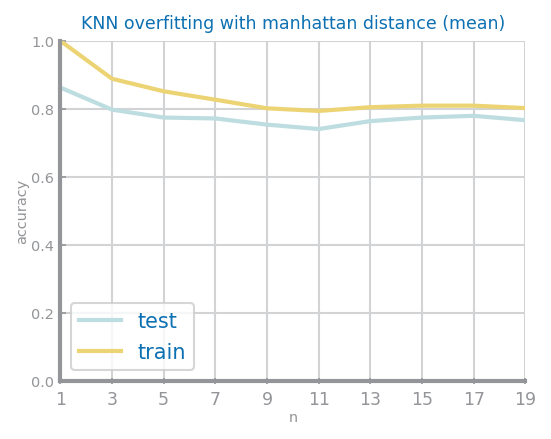

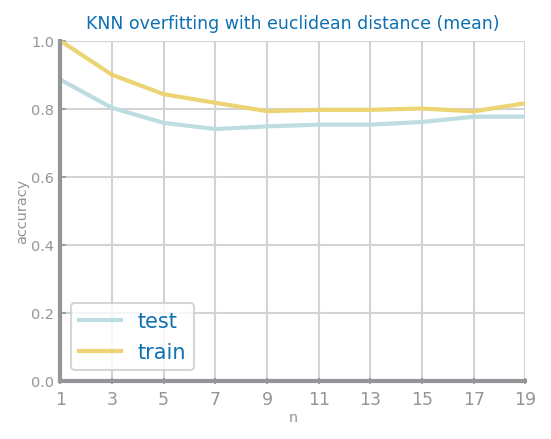

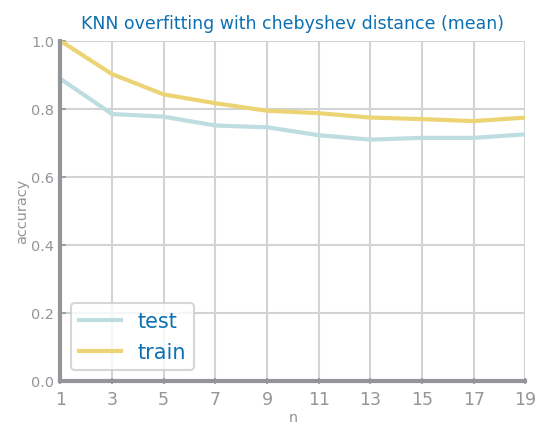

{'manhattan test': array([0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01]), 'manhattan train': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'euclidean test': array([0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]), 'euclidean train': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'chebyshev test': array([0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]), 'chebyshev train': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}


In [2]:
from g20_KNN import crossValKNN
crossValKNN(X, y, labels, "Heart")
from g20_KNN import overfitting_cvKNN
overfitting_cvKNN(X, y, labels)

# Naive Bayes

In [2]:
import numpy as np
import pandas as pd
import g20_functions as g20
import ds_functions as ds
# NB uses the manual selection
data = g20.balanceData(g20.loadHeartGFRselected(), dataset='Heart', graphs = False)['OverSample']


-> 5-fold CrossVal for Heart:

-> fold 0 for Heart:

-> fold 1 for Heart:

-> fold 2 for Heart:

-> fold 3 for Heart:

-> fold 4 for Heart:


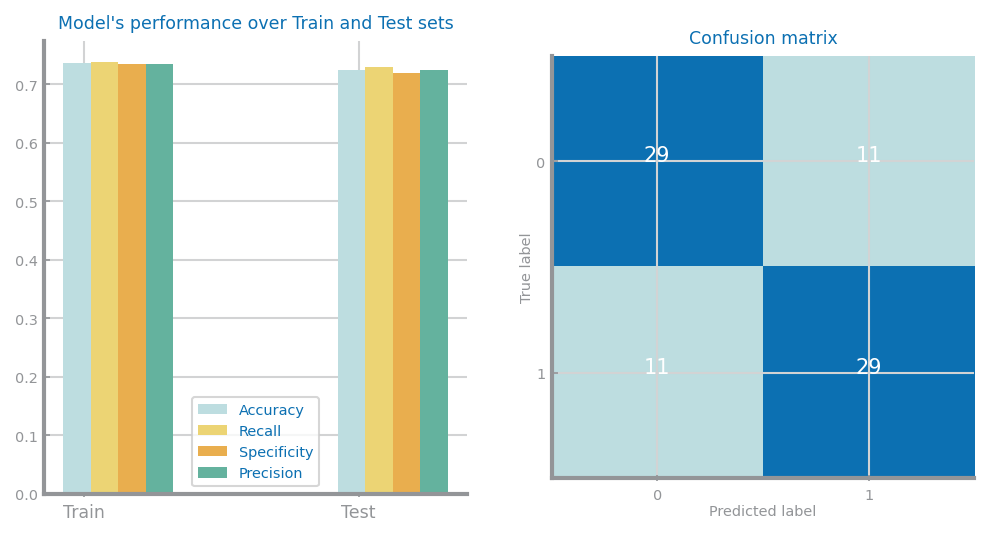

Heart
CrossVal best estimator: GaussianNB with score 0.79
CrossVal mean score: [0.72 0.71 0.53]
CrossVal std: [0.05 0.03 0.05]
CrossVal 95% confidence: [0.01 0.01 0.01]


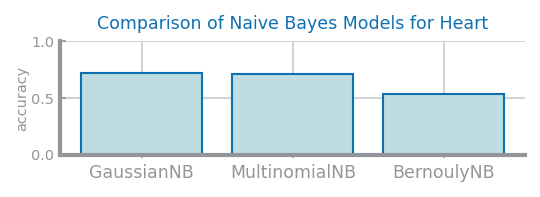

In [3]:
X, y, labels = g20.xySplit(data, target='DEATH_EVENT')
from g20_Naive_Bayes import crossValNaiveBayes
crossValNaiveBayes(X, y, labels, "Heart")

# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import g20_functions as g20
import ds_functions as ds
# DT uses 6-best features and removes outliers using local outlier factor 0.1
data = g20.outlierRemovalData(
    g20.fs_k_best(g20.balanceData(g20.loadHeartGFR(), dataset='Heart',
                                  graphs = False)['OverSample'],
                       dataset="Heart",k=6), dataset='Heart')['Local Outlier Factor 0.1']


SelectKBest k = 6, 6 features selected
(401, 6)
(401, 1)
(385, 6)
(385, 1)
(365, 6)
(365, 1)
(403, 6)
(403, 1)
(387, 6)
(387, 1)
(367, 6)
(367, 1)
(351, 6)
(351, 1)
(351, 6)
(351, 1)
(351, 6)
(351, 1)



-> 5-fold CrossVal for Heart:
-> Fold 0 for Heart:


<Figure size 600x450 with 0 Axes>

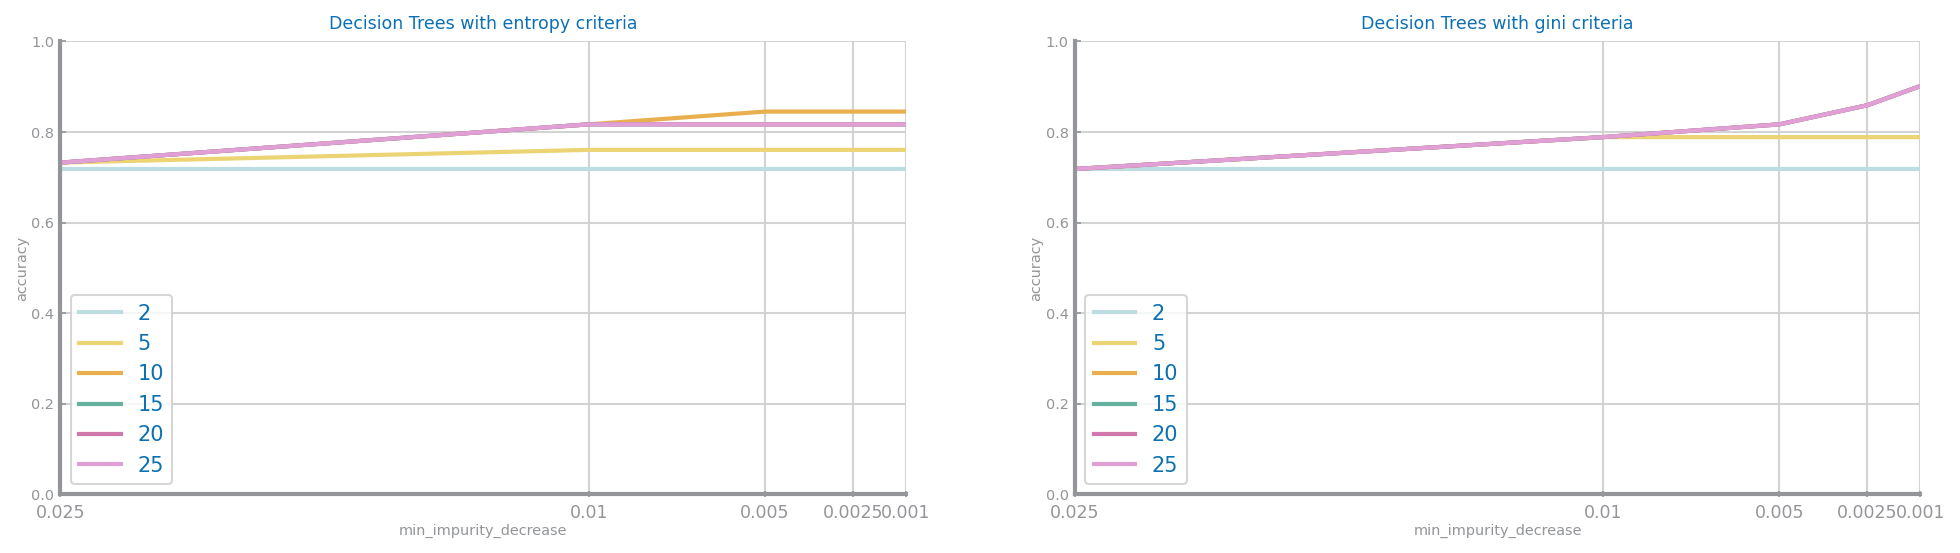

Best results achieved with gini criteria, depth=10 and min_impurity_decrease=0.00 ==> accuracy=0.90


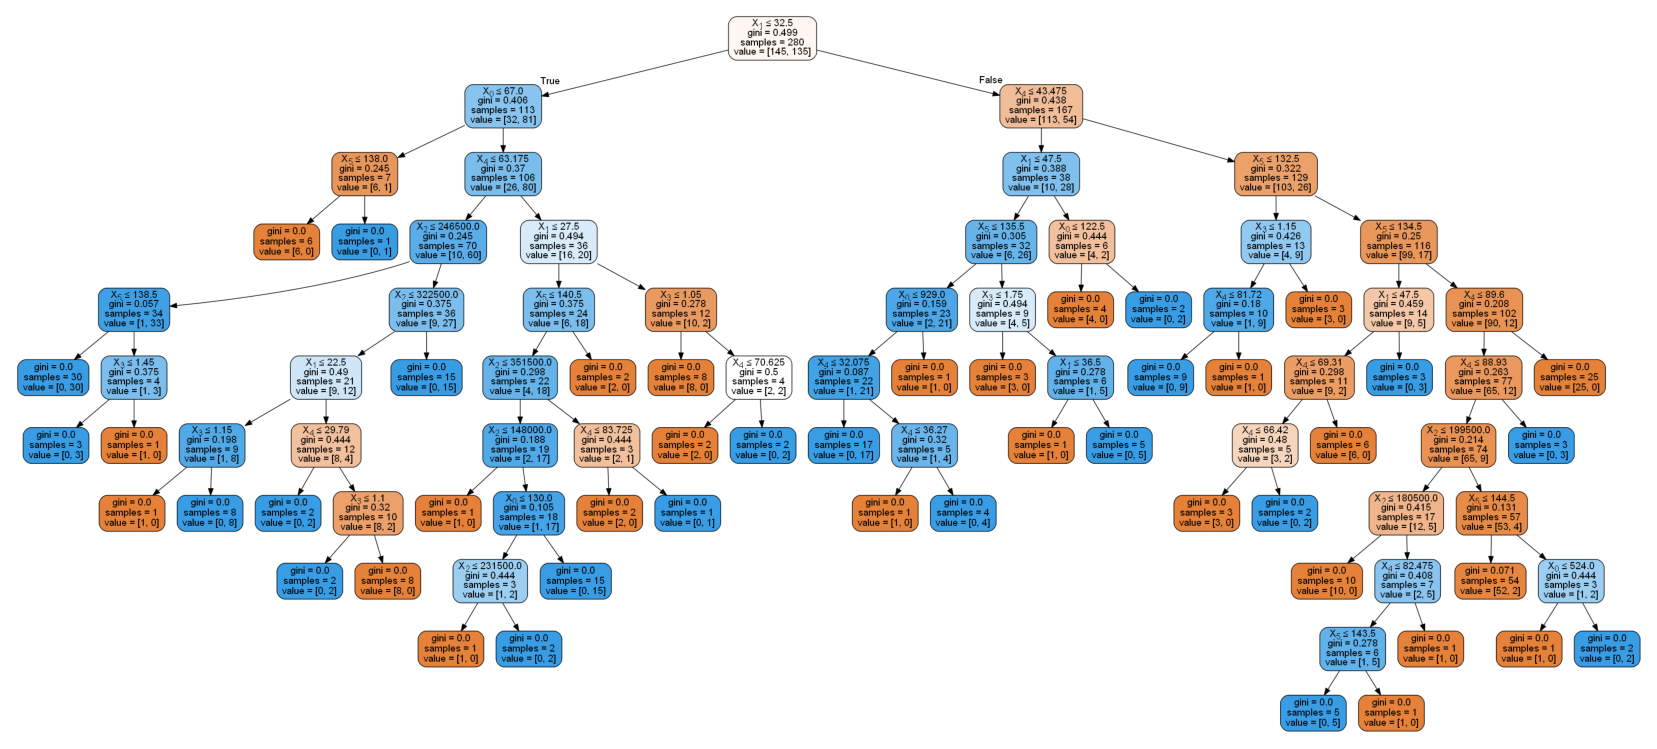

-> Fold 1 for Heart:


<Figure size 600x450 with 0 Axes>

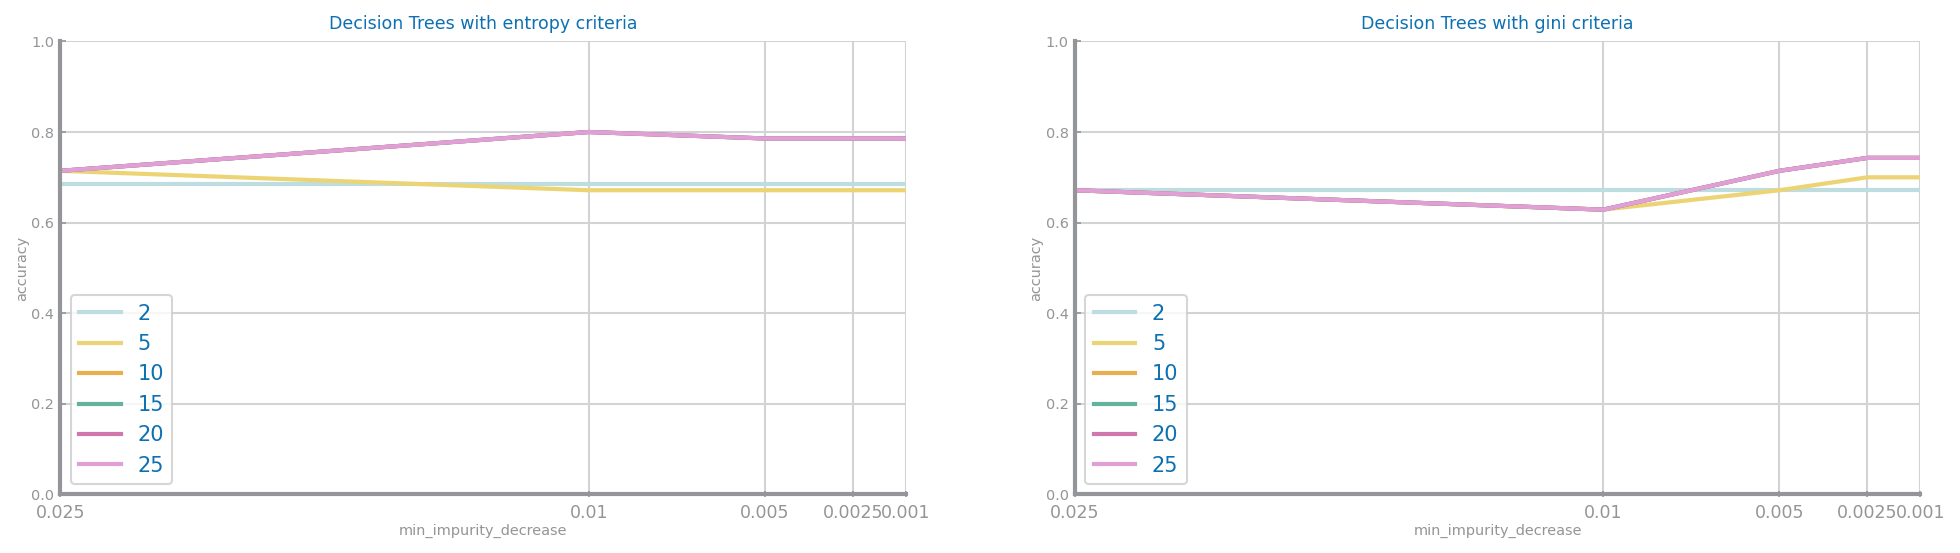

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.01 ==> accuracy=0.80


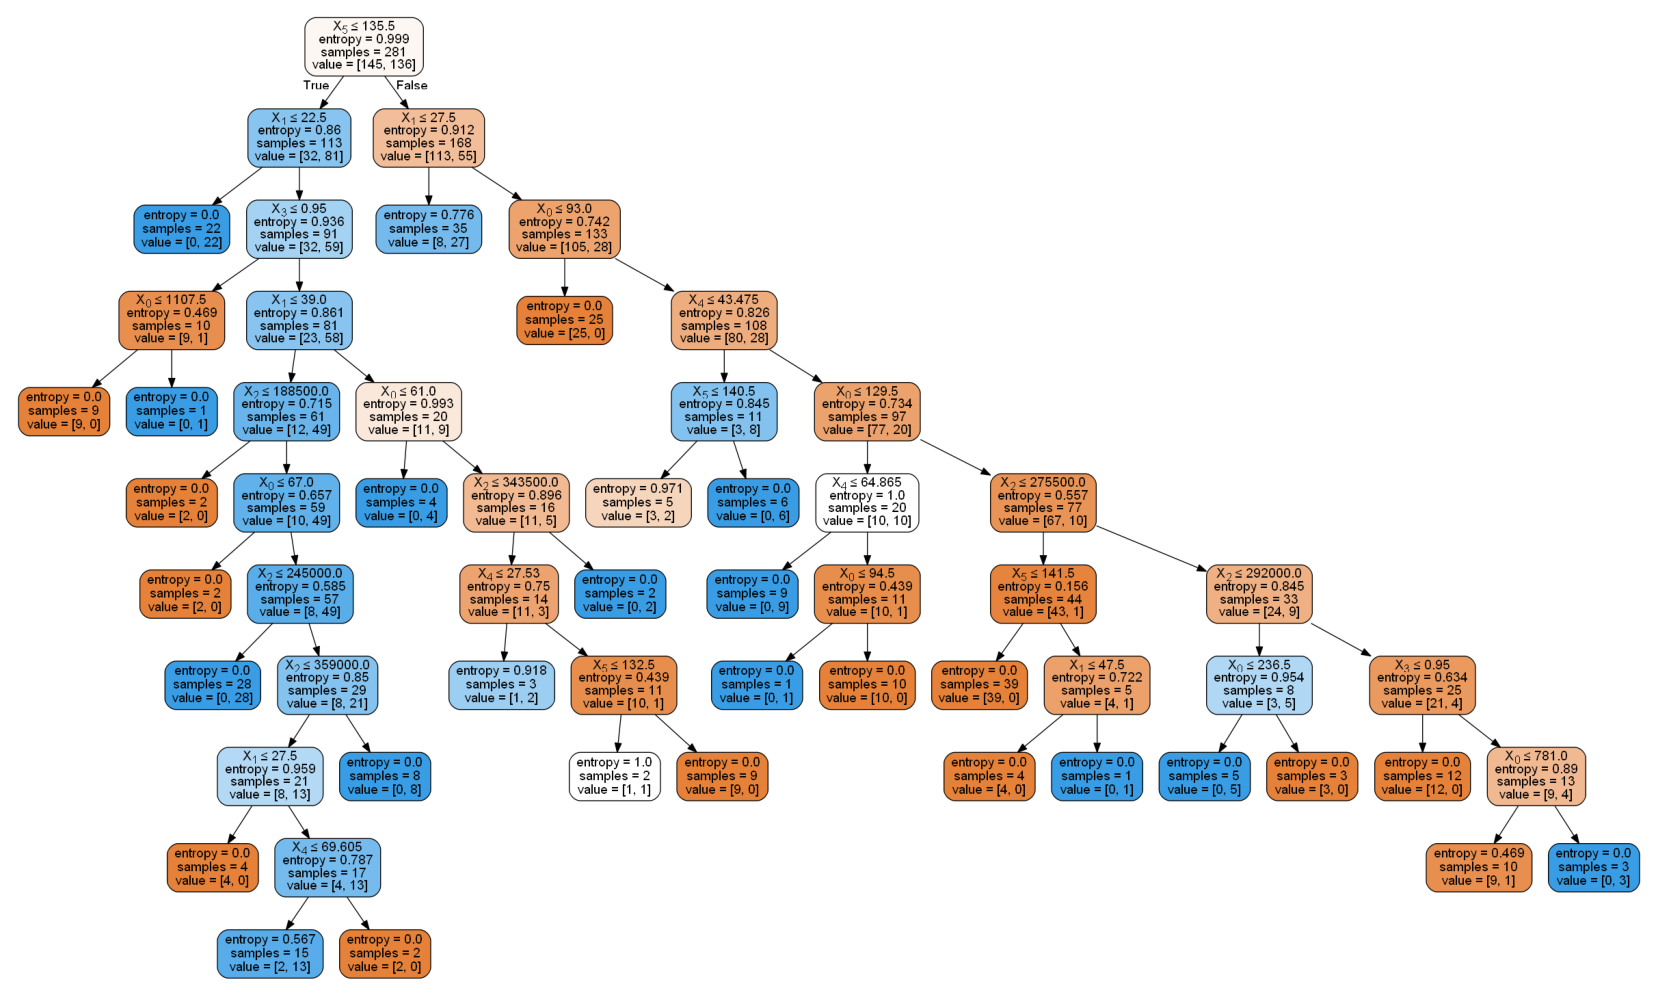

-> Fold 2 for Heart:


<Figure size 600x450 with 0 Axes>

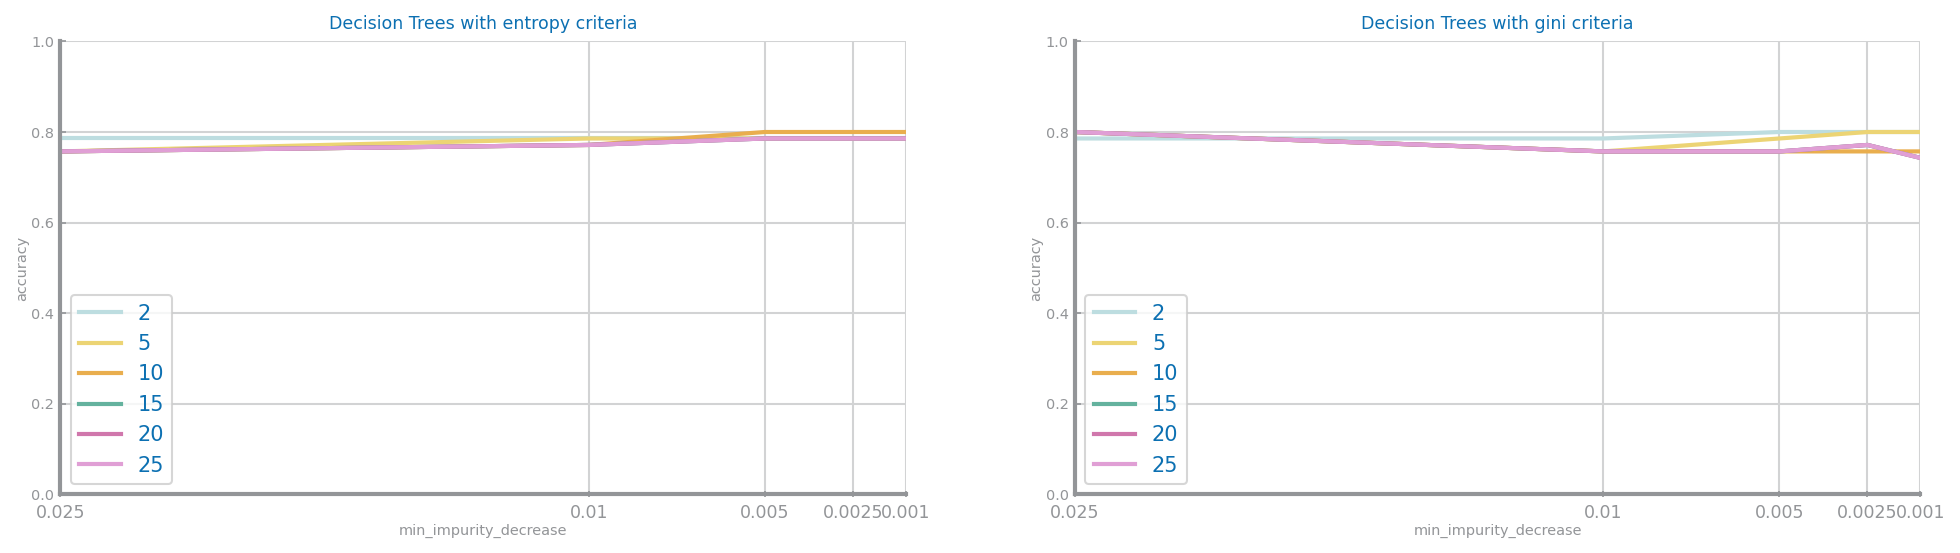

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.01 ==> accuracy=0.80


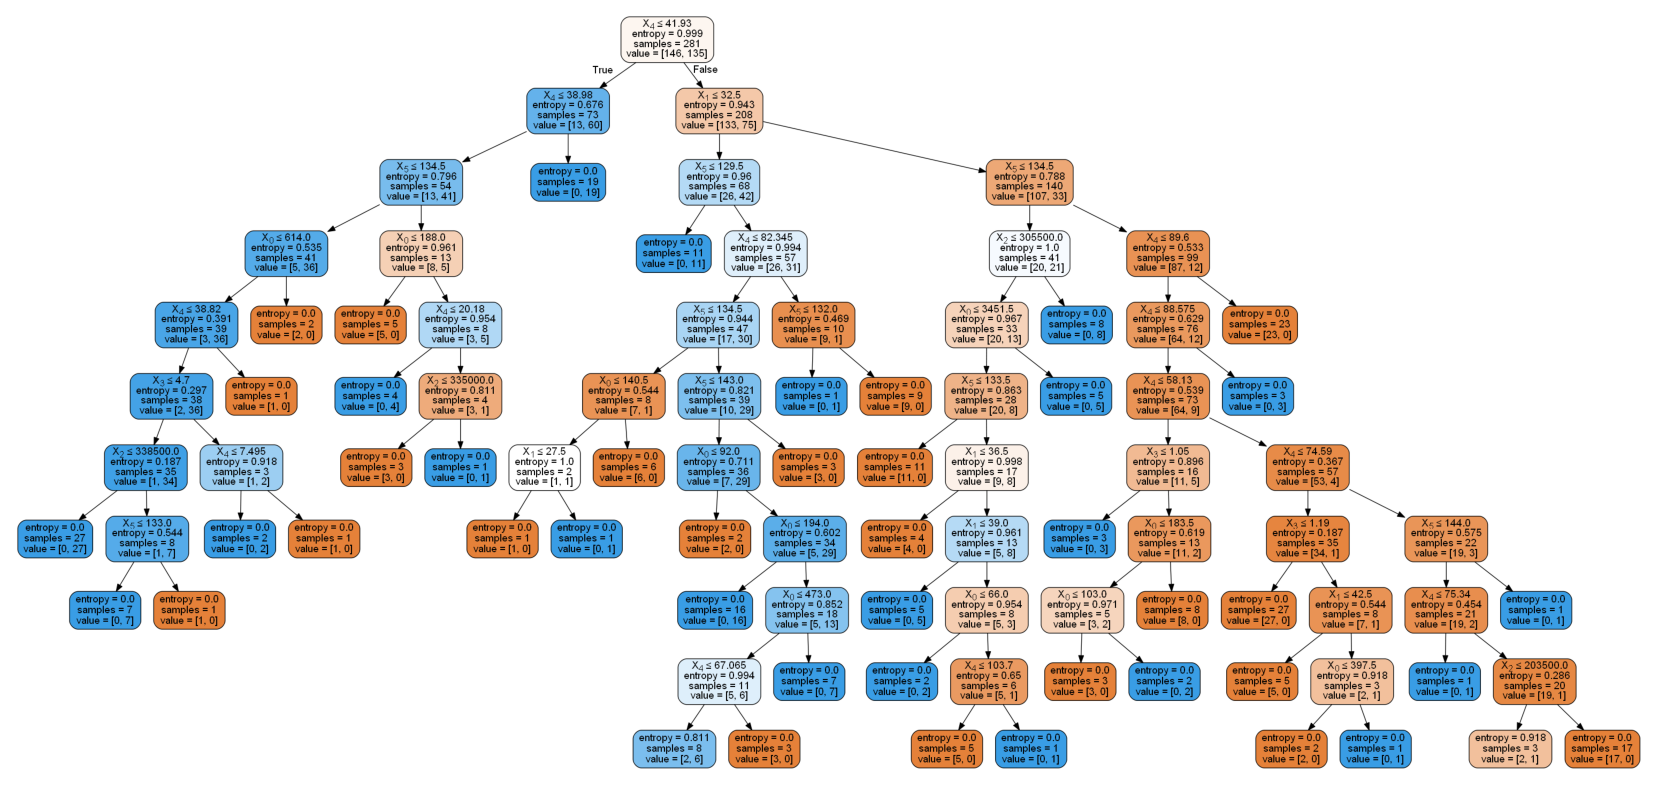

-> Fold 3 for Heart:


<Figure size 600x450 with 0 Axes>

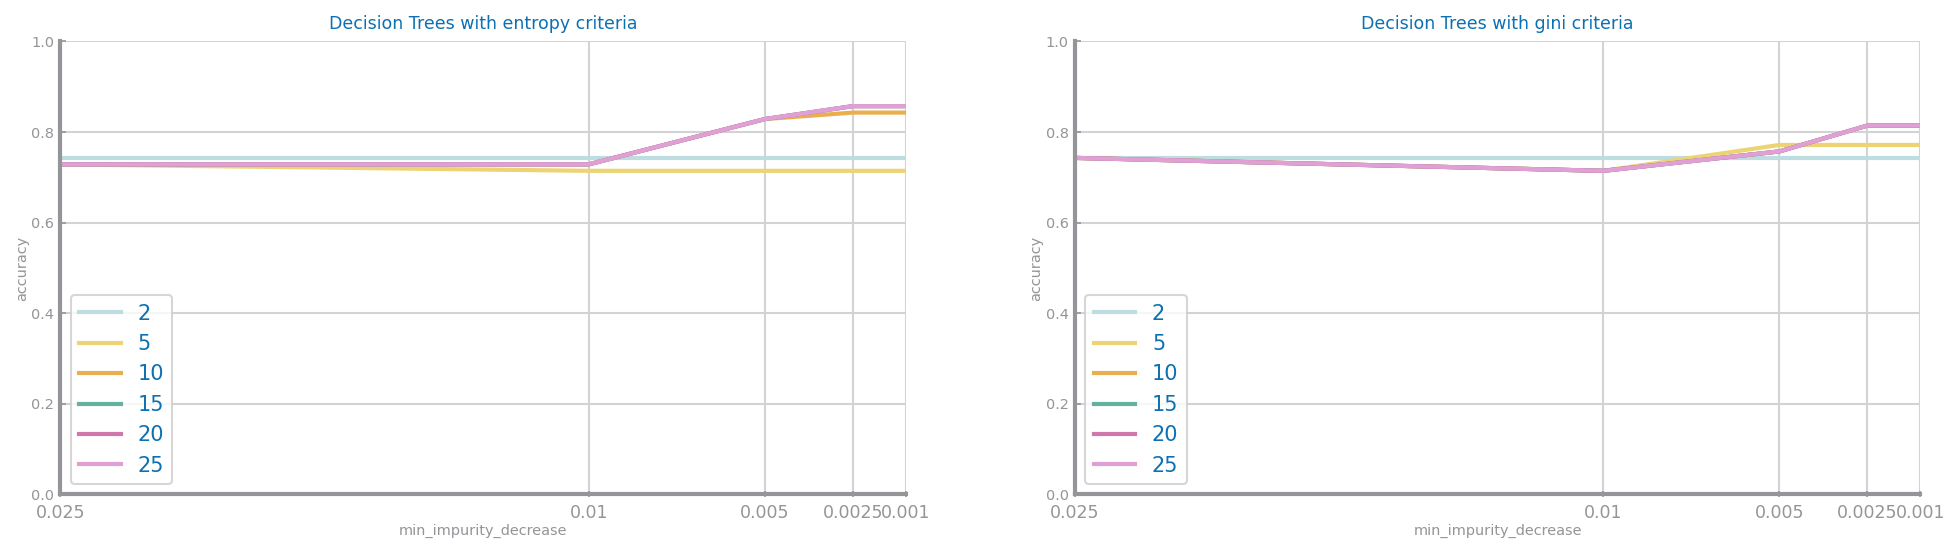

Best results achieved with entropy criteria, depth=15 and min_impurity_decrease=0.00 ==> accuracy=0.86


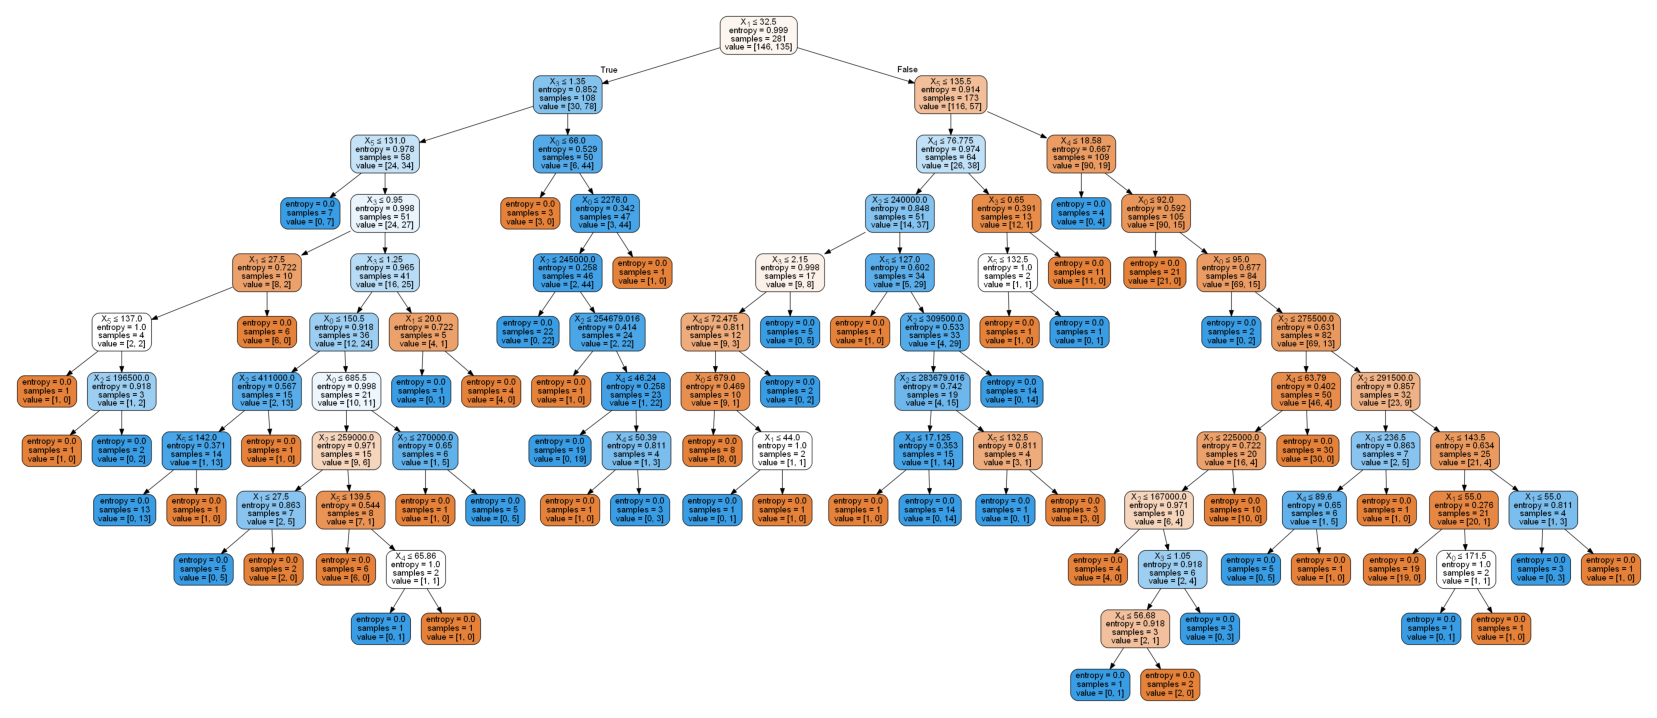

-> Fold 4 for Heart:


<Figure size 600x450 with 0 Axes>

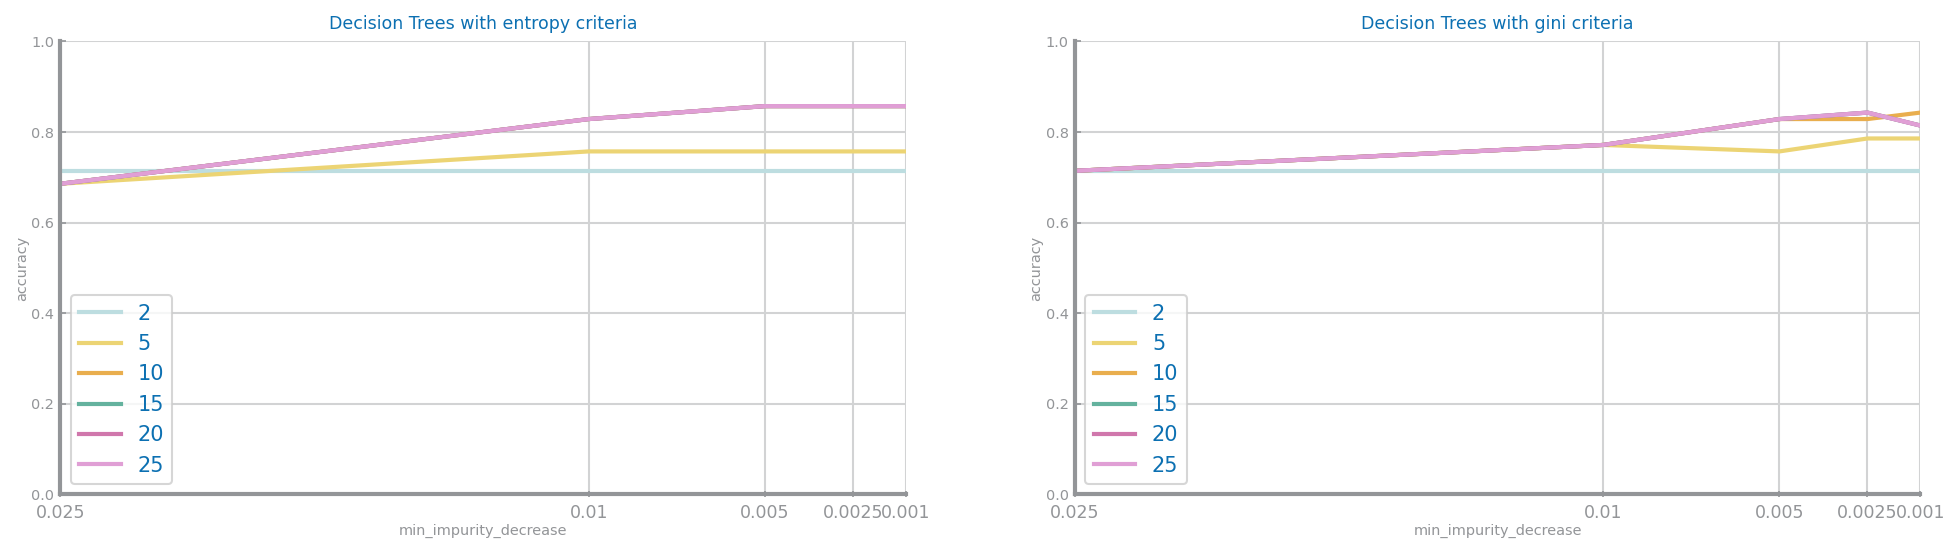

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.01 ==> accuracy=0.86


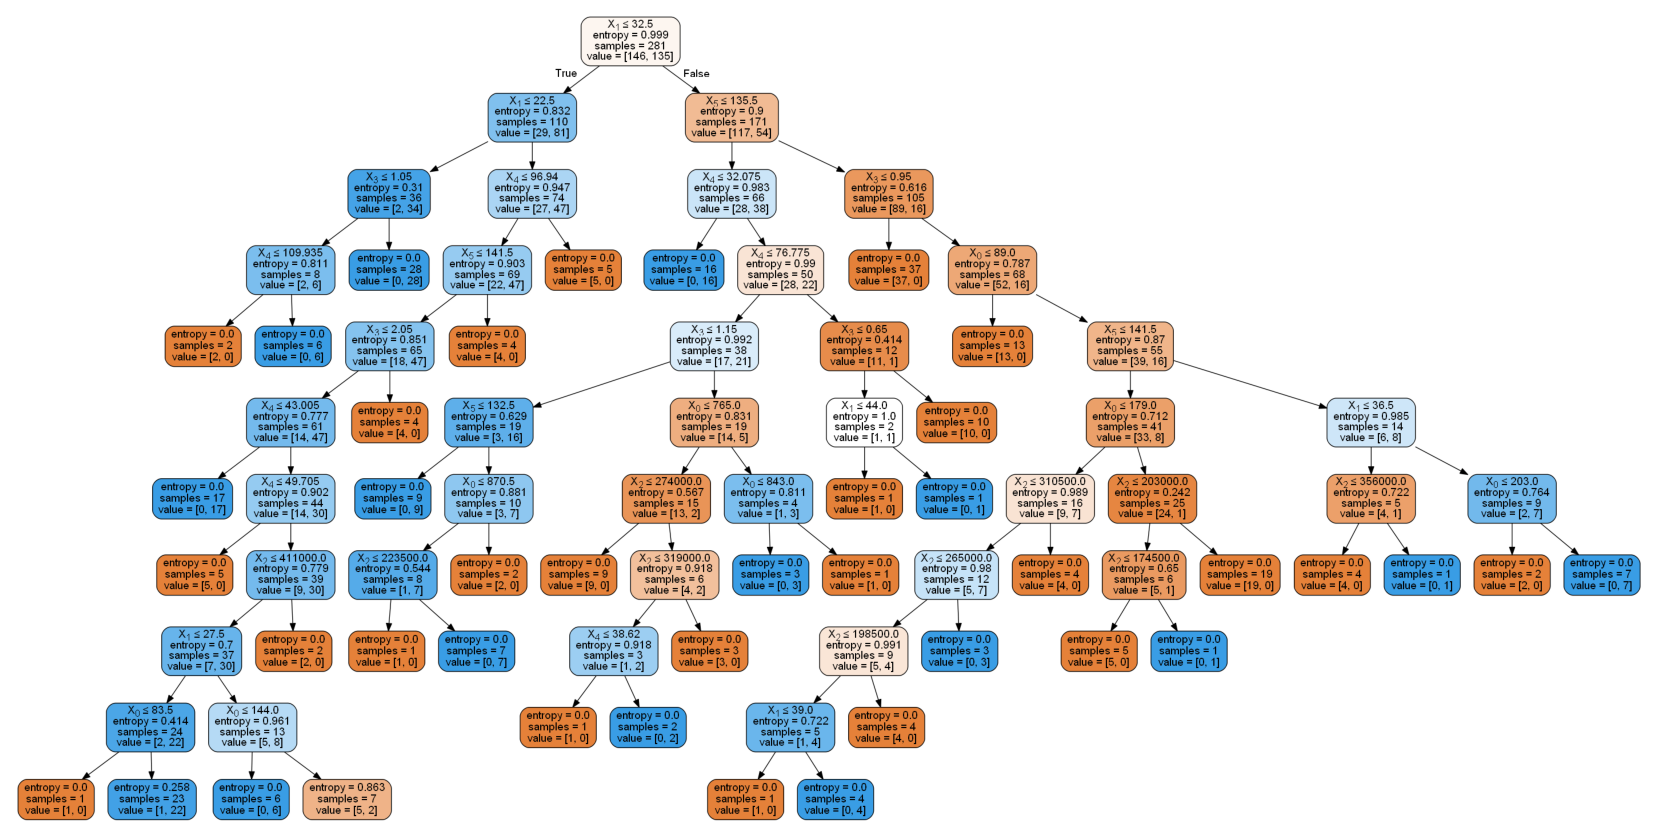

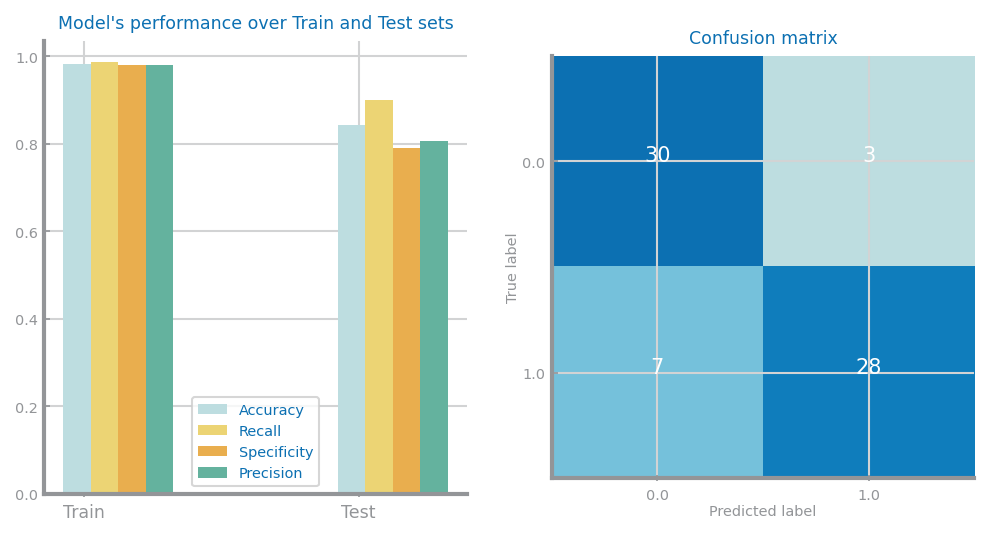


-> Average for 5-fold CrossVal for Heart:
CrossVal mean score: 0.843138832997988
CrossVal std: 0.0388


In [2]:
X, y, labels = g20.xySplit(data, target='DEATH_EVENT')
from g20_Decision_Trees import crossValDT
DToutput = crossValDT(X, y, labels, "Heart", output = True)

In [4]:
import shelve
with shelve.open("Heart") as db:
    db["DT"]=DToutput

In [29]:
import shelve
DToutput = None
with shelve.open("Heart") as db:
    DToutput=db["DT"]

entropy
{0.025: [0.006365575725084588, 0.004455295531338066, 0.004455295531338066, 0.004455295531338066, 0.004455295531338066, 0.004455295531338066], 0.01: [0.006365575725084588, 0.007669121602801786, 0.006811286245154431, 0.006811286245154431, 0.006811286245154431, 0.006811286245154431], 0.005: [0.006365575725084588, 0.007669121602801786, 0.005100114017751065, 0.005153830375521132, 0.005153830375521132, 0.005153830375521132], 0.0025: [0.006365575725084588, 0.007669121602801786, 0.00531764989620492, 0.00607907188605381, 0.00607907188605381, 0.00607907188605381], 0.001: [0.006365575725084588, 0.007669121602801786, 0.00531764989620492, 0.00607907188605381, 0.00607907188605381, 0.00607907188605381]}
gini
{0.025: [0.007120826557940306, 0.008006001780905866, 0.008006001780905866, 0.008006001780905866, 0.008006001780905866, 0.008006001780905866], 0.01: [0.007120826557940306, 0.010887049806032074, 0.010887049806032074, 0.010887049806032074, 0.010887049806032074, 0.010887049806032074], 0.005: 

<Figure size 600x450 with 0 Axes>

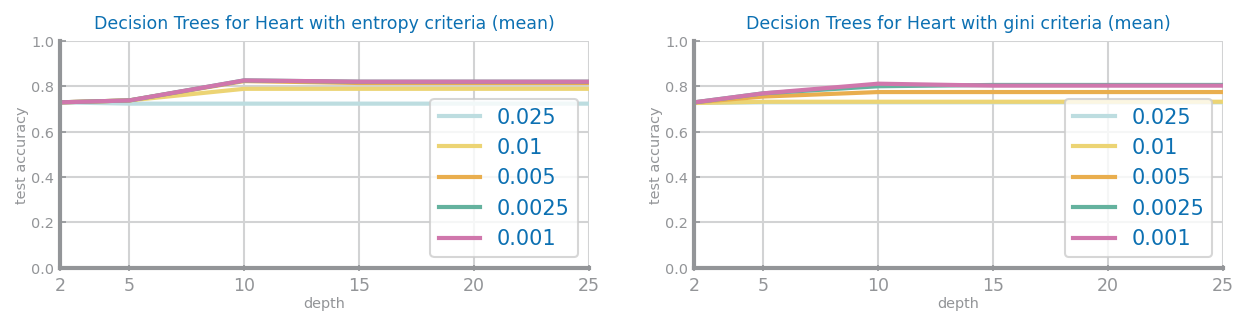

entropy
{0.025: [0.0028301898648394864, 0.004288253334734664, 0.004288253334734664, 0.004288253334734664, 0.004288253334734664, 0.004288253334734664], 0.01: [0.0028301898648394864, 0.002863480732074098, 0.00402661774334854, 0.004856703199135645, 0.004856703199135645, 0.004856703199135645], 0.005: [0.0028301898648394864, 0.0023009607709653336, 0.00027432638535841253, 0.0005409252669039129, 0.0005409252669039129, 0.0005409252669039129], 0.0025: [0.0028301898648394864, 0.0023009607709653336, 0.000664868518346503, 0.0, 0.0, 0.0], 0.001: [0.0028301898648394864, 0.0023009607709653336, 0.000664868518346503, 0.0, 0.0, 0.0]}
gini
{0.025: [0.0030004689299042457, 0.002138714944563882, 0.002138714944563882, 0.002138714944563882, 0.002138714944563882, 0.002138714944563882], 0.01: [0.0025858989526263603, 0.0037698257536905714, 0.003956820699893422, 0.003956820699893422, 0.003956820699893422, 0.003956820699893422], 0.005: [0.002256996091545645, 0.0030828866534692674, 0.0026063147480751463, 0.00310659

<Figure size 600x450 with 0 Axes>

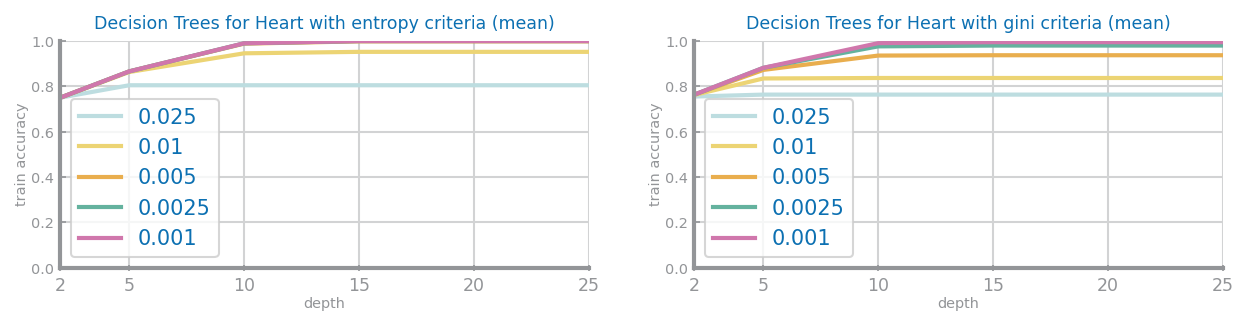

In [39]:
%run Functions_for_Graphics_DT.ipynb
plot_DT_cv(DToutput)

# Random Forest

In [1]:
import numpy as np
import pandas as pd
import g20_functions as g20
import ds_functions as ds
# RF ises 5-best features
data = g20.fs_k_best(g20.balanceData(g20.loadHeartGFR(), dataset='Heart',
                                     graphs = False)['OverSample'],
                       dataset="Heart")['k=5']
X, y, labels = g20.xySplit(data, target='DEATH_EVENT')


SelectKBest k = 2, 2 features selected

SelectKBest k = 3, 3 features selected

SelectKBest k = 4, 4 features selected

SelectKBest k = 5, 5 features selected

SelectKBest k = 6, 6 features selected

SelectKBest k = 7, 7 features selected

SelectKBest k = 8, 8 features selected

SelectKBest k = 9, 9 features selected



-> 5-fold CrossVal for Heart:
-> Fold 0 for Heart:


<Figure size 600x450 with 0 Axes>

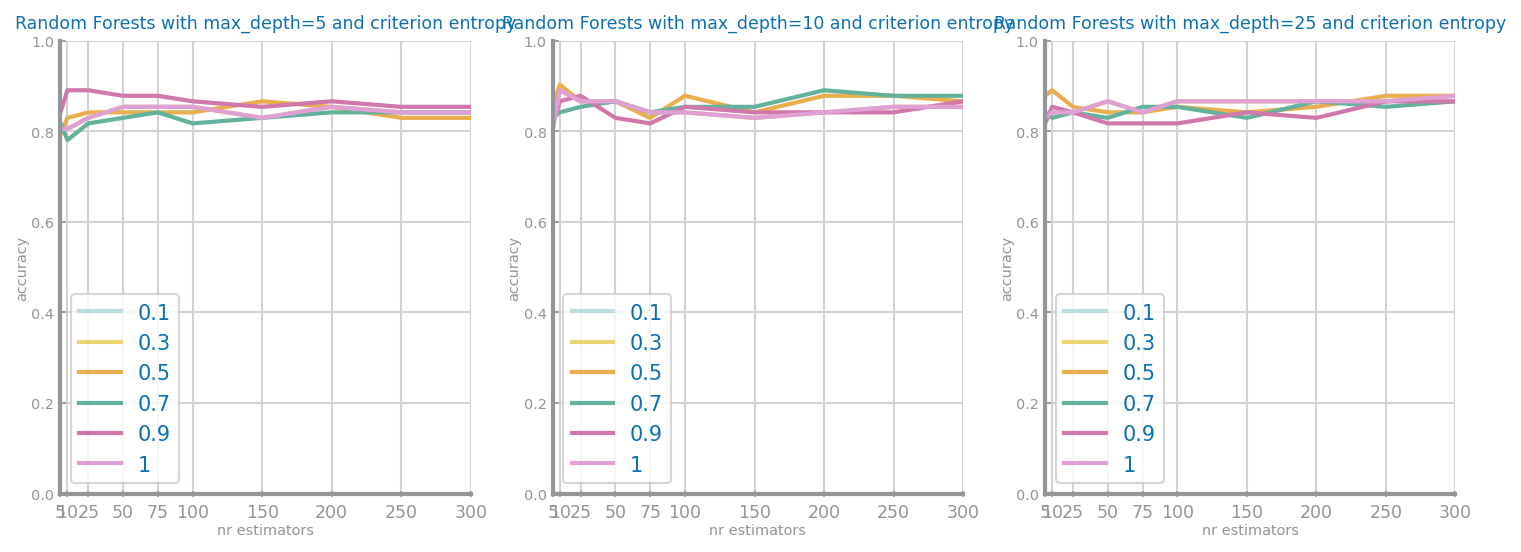

<Figure size 600x450 with 0 Axes>

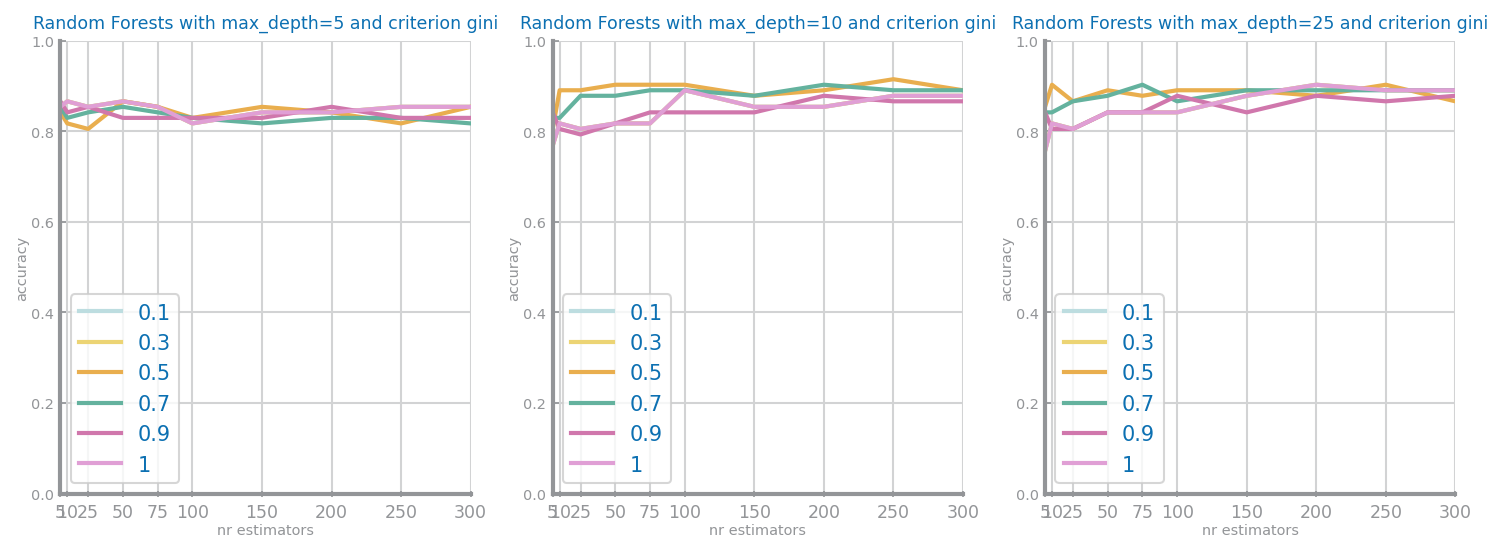

Best results with depth=10, 0.50 features, gini criterion  and 250 estimators, with accuracy=0.91
-> Fold 1 for Heart:


<Figure size 600x450 with 0 Axes>

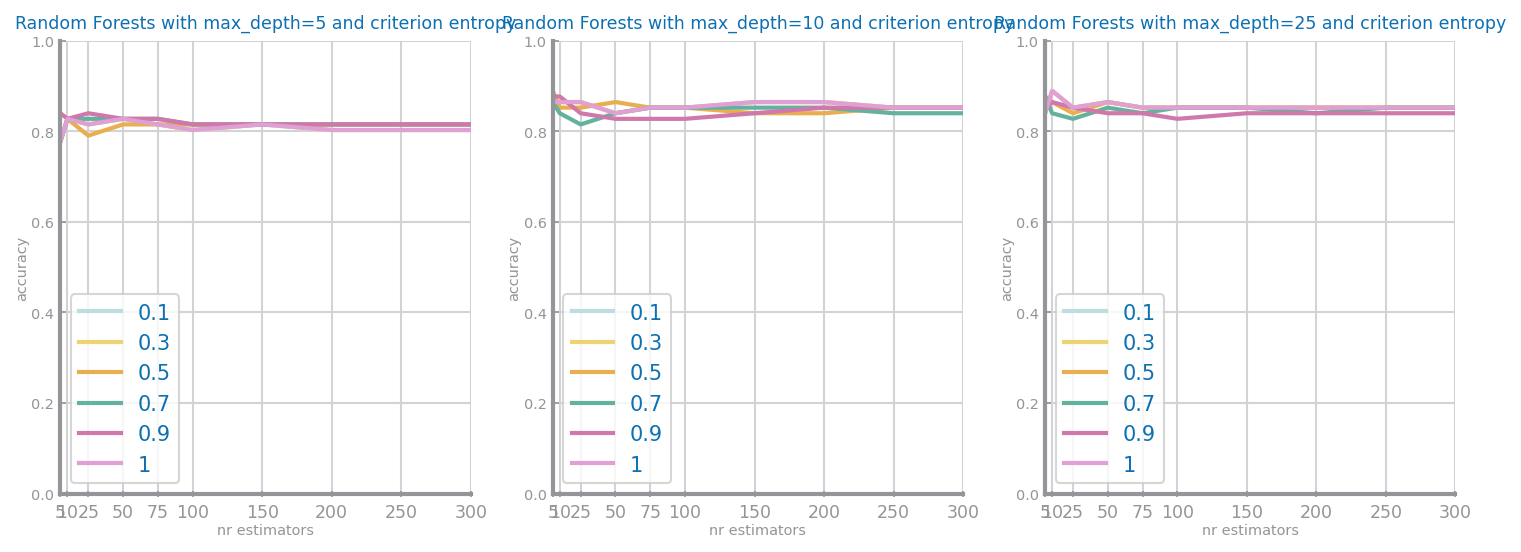

<Figure size 600x450 with 0 Axes>

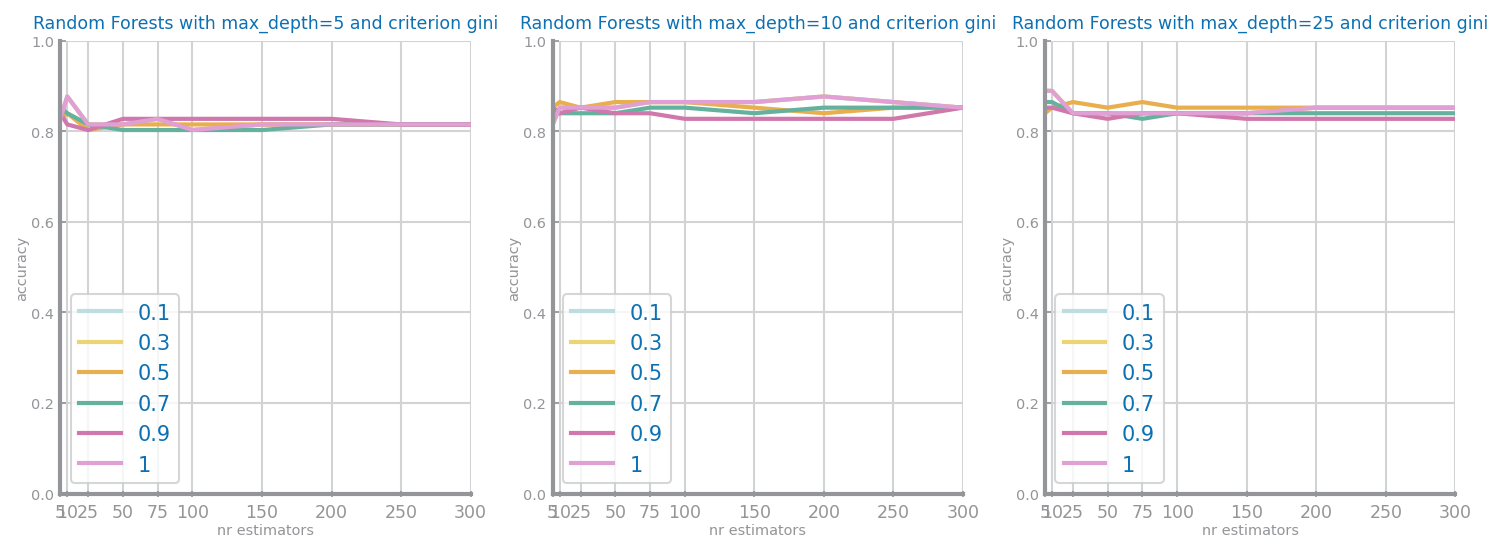

Best results with depth=10, 0.50 features, entropy criterion  and 5 estimators, with accuracy=0.89
-> Fold 2 for Heart:


<Figure size 600x450 with 0 Axes>

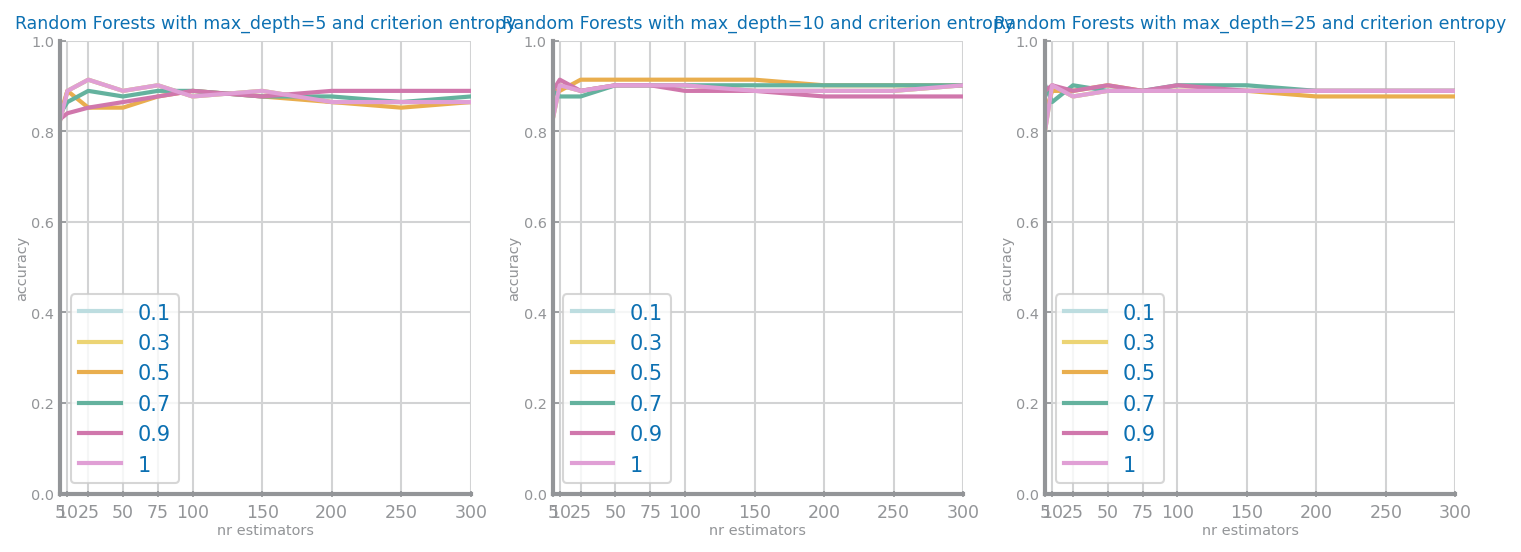

<Figure size 600x450 with 0 Axes>

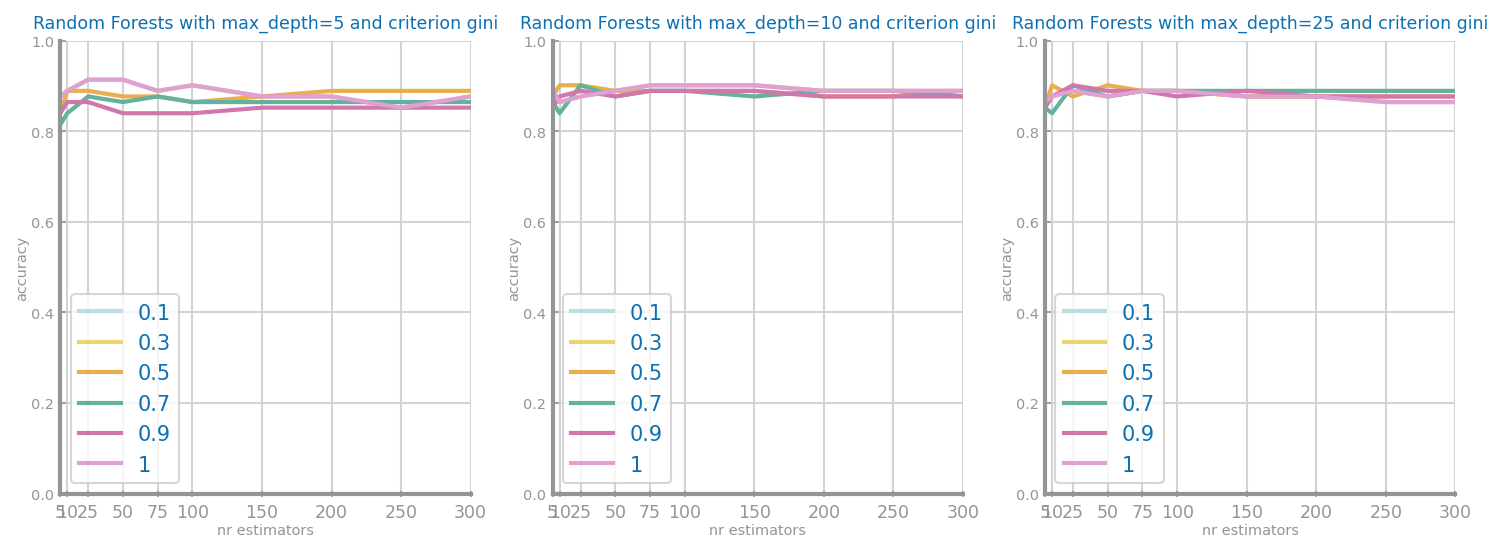

Best results with depth=5, 0.10 features, entropy criterion  and 25 estimators, with accuracy=0.91
-> Fold 3 for Heart:


<Figure size 600x450 with 0 Axes>

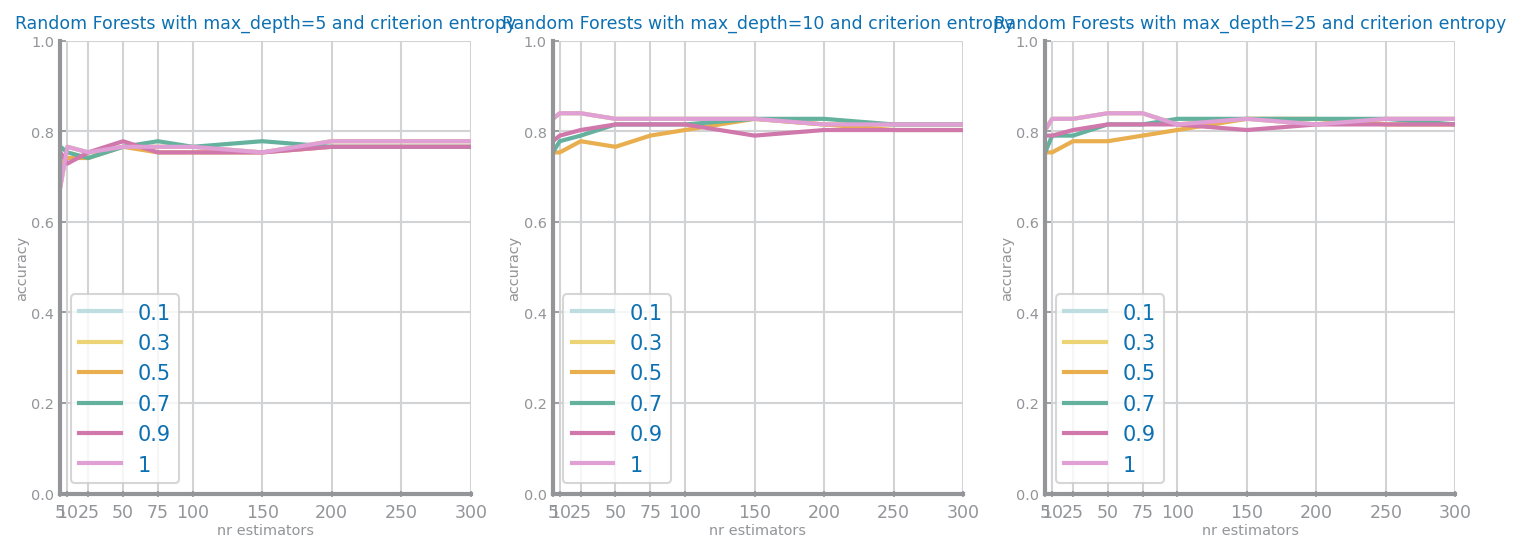

<Figure size 600x450 with 0 Axes>

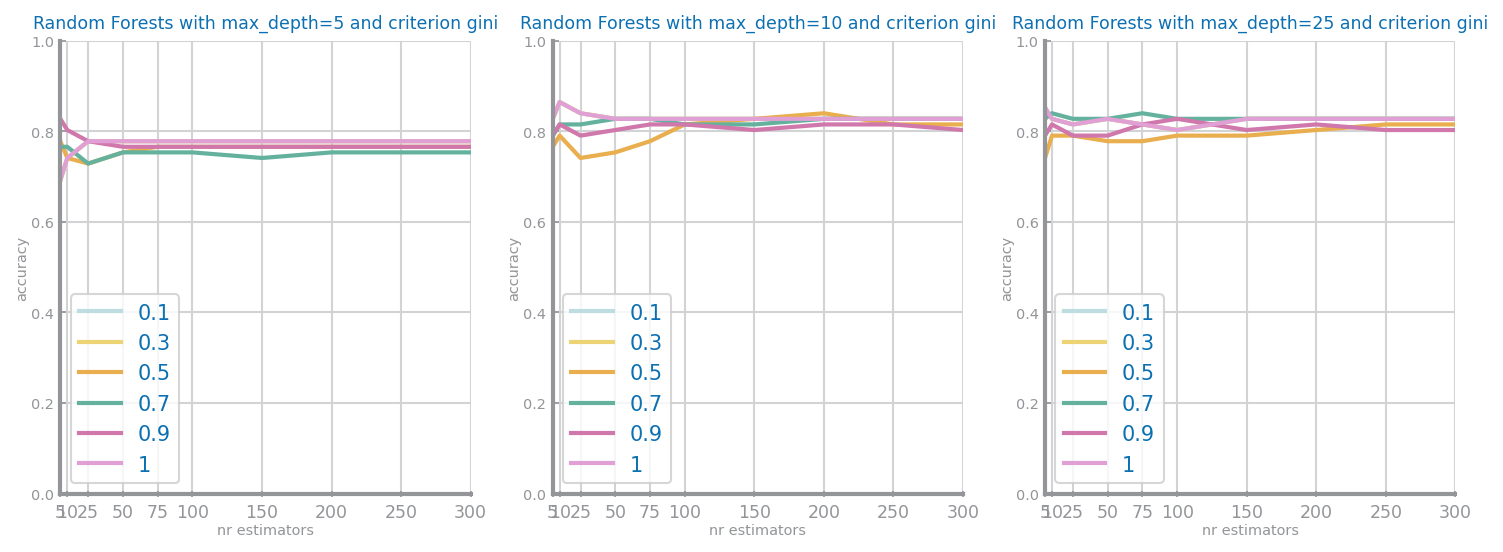

Best results with depth=10, 0.10 features, gini criterion  and 10 estimators, with accuracy=0.86
-> Fold 4 for Heart:


<Figure size 600x450 with 0 Axes>

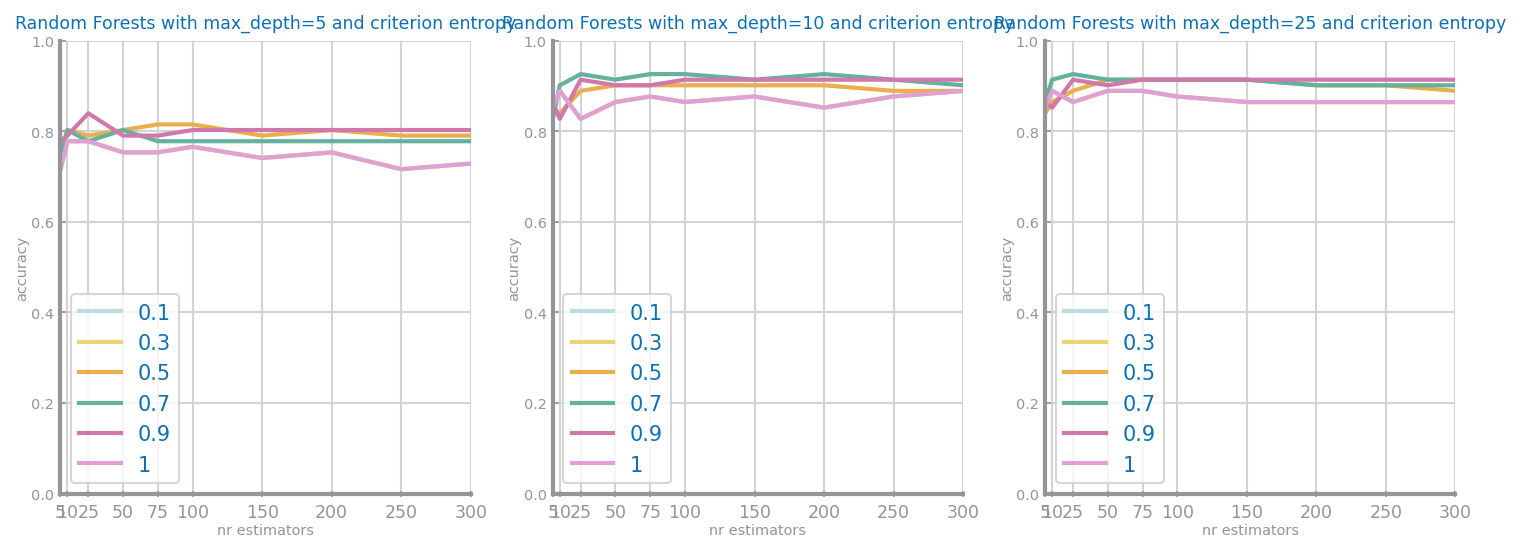

<Figure size 600x450 with 0 Axes>

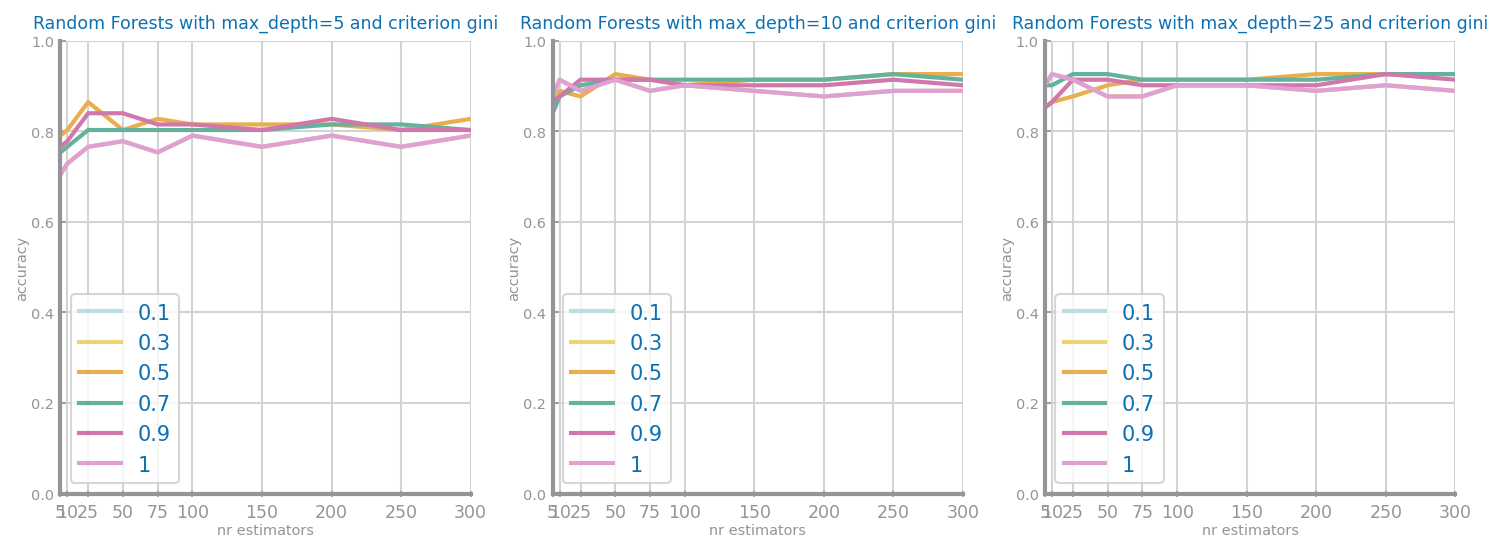

Best results with depth=10, 0.70 features, entropy criterion  and 25 estimators, with accuracy=0.93


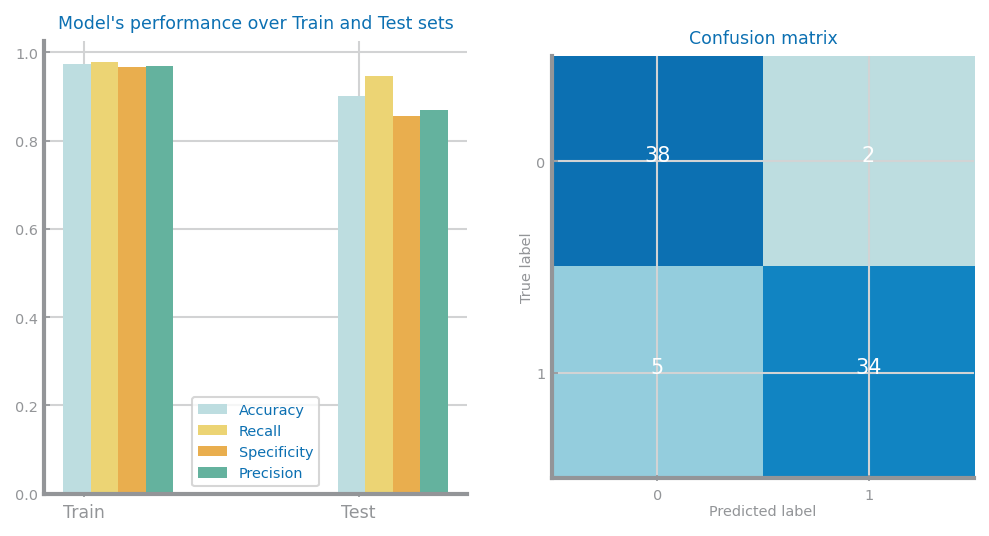


-> Average for 5-fold CrossVal for Heart:
CrossVal mean score: 0.9014453477868111
CrossVal std: 0.0222


In [2]:
from g20_Random_Forests import crossValRF
RFoutput = crossValRF(X, y, labels, "Heart", output = True)

In [3]:
import shelve
with shelve.open("Heart") as db:
    db["RF"]=RFoutput

In [43]:
import shelve
RFoutput = None
with shelve.open("Heart") as db:
    RFoutput=db["RF"]

entropy
{0.1: [0.0039552104599219085, 0.0042260191227046495, 0.004113356899922024, 0.004843893982454519, 0.0049994107844099295, 0.004781527821406798, 0.00473848146396352, 0.00465639841018036, 0.004818650411239743, 0.005801275963658153], 0.3: [0.0039552104599219085, 0.0042260191227046495, 0.004113356899922024, 0.004843893982454519, 0.0049994107844099295, 0.004781527821406798, 0.00473848146396352, 0.00465639841018036, 0.004818650411239743, 0.005801275963658153], 0.5: [0.00946403680890506, 0.009955529919146468, 0.008734101281257584, 0.009889091990529612, 0.00867608338262907, 0.007517763211013081, 0.006748544261229011, 0.006551714502547176, 0.006655762422719172, 0.006540033647280943], 0.7: [0.008719285763876605, 0.007921998297410714, 0.00902505190712898, 0.00701830434842078, 0.007717429830760079, 0.0074773371846155205, 0.00618898208752983, 0.006715793868266269, 0.0070649919789134204, 0.006551714502547176], 0.9: [0.007874547578139829, 0.008059654120760176, 0.0074366385878028626, 0.007273276

<Figure size 600x450 with 0 Axes>

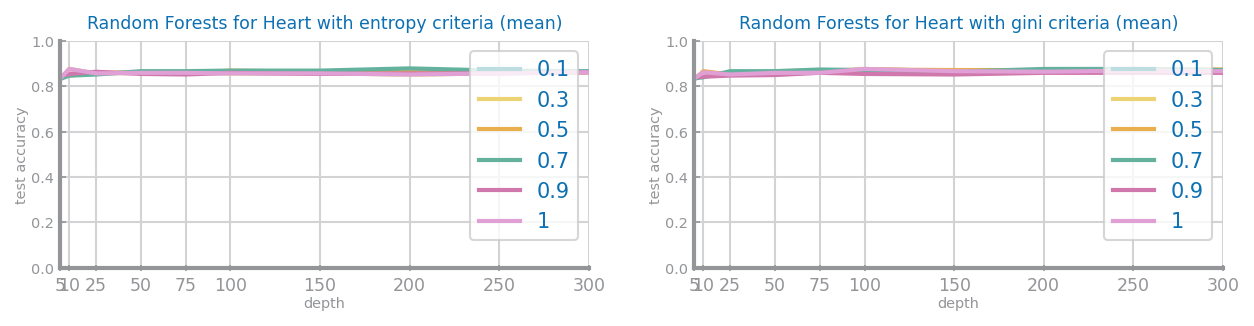

entropy
{0.1: [0.0025207226704655103, 0.0005949335309790753, 0.0005978931144692509, 0.00046823553037356744, 0.0005237042020783429, 0.000438644313336425, 0.0002868444233351864, 0.00023402763408056476, 0.00028669728682546164, 0.00028669728682546164], 0.3: [0.0025207226704655103, 0.0005949335309790753, 0.0005978931144692509, 0.00046823553037356744, 0.0005237042020783429, 0.000438644313336425, 0.0002868444233351864, 0.00023402763408056476, 0.00028669728682546164, 0.00028669728682546164], 0.5: [0.0010109048071304289, 0.0010741073151170105, 0.0005964778229112842, 0.0002866972868254617, 0.00028669728682546164, 0.00023384615384615466, 0.00023456790123456894, 0.0002868444233351864, 0.00023456790123456894, 0.00023456790123456894], 0.7: [0.0014523982208887016, 0.001263668998837786, 0.0007028037199140991, 0.000438644313336425, 0.0002338461538461547, 0.0, 0.0, 0.0, 0.0, 0.0], 0.9: [0.0011518534332990735, 0.0010095117642410273, 0.000438644313336425, 0.0002868444233351864, 0.0, 0.0, 0.0, 0.0002338461

<Figure size 600x450 with 0 Axes>

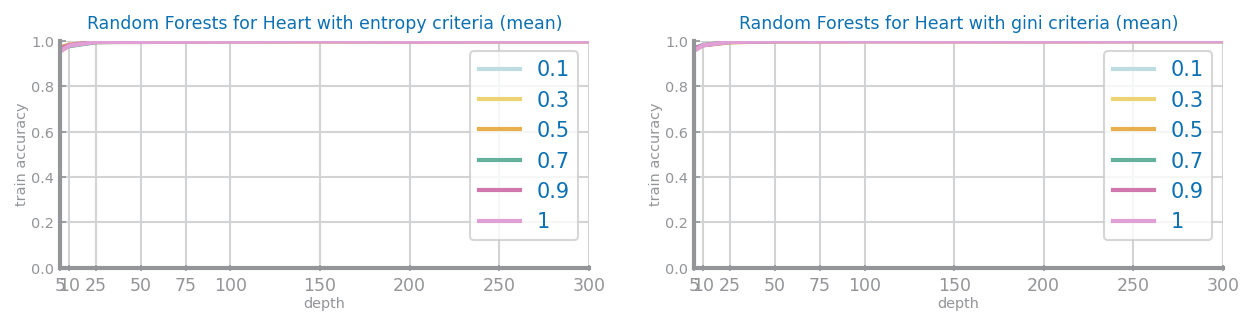

In [53]:
%run Functions_for_Graphics_RF.ipynb
plot_RF_cv(RFoutput,10)

In [45]:
print(RFoutput)

[{'entropy': {5: {0.1: {5: {'train': 0.8827160493827161, 'test': 0.8048780487804879}, 10: {'train': 0.8549382716049383, 'test': 0.8048780487804879}, 25: {'train': 0.9104938271604939, 'test': 0.8292682926829268}, 50: {'train': 0.9197530864197531, 'test': 0.8536585365853658}, 75: {'train': 0.9135802469135802, 'test': 0.8536585365853658}, 100: {'train': 0.8981481481481481, 'test': 0.8536585365853658}, 150: {'train': 0.904320987654321, 'test': 0.8292682926829268}, 200: {'train': 0.9135802469135802, 'test': 0.8536585365853658}, 250: {'train': 0.9197530864197531, 'test': 0.8414634146341463}, 300: {'train': 0.9104938271604939, 'test': 0.8414634146341463}}, 0.3: {5: {'train': 0.8827160493827161, 'test': 0.8048780487804879}, 10: {'train': 0.8549382716049383, 'test': 0.8048780487804879}, 25: {'train': 0.9104938271604939, 'test': 0.8292682926829268}, 50: {'train': 0.9197530864197531, 'test': 0.8536585365853658}, 75: {'train': 0.9135802469135802, 'test': 0.8536585365853658}, 100: {'train': 0.89814

# Gradient Boosting

In [5]:
import numpy as np
import pandas as pd
import g20_functions as g20
import ds_functions as ds
# GB 3-best features and removes outliers using isolation forest 0.01
data = g20.outlierRemovalData(
    g20.fs_k_best(g20.balanceData(g20.loadHeartGFR(), dataset='Heart',
                                  graphs = False)['OverSample'],
                       dataset="Heart")['k=4'], dataset='Heart')['Isolation Forest 0.01']
X, y, labels = g20.xySplit(data, target='DEATH_EVENT')


SelectKBest k = 2, 2 features selected

SelectKBest k = 3, 3 features selected

SelectKBest k = 4, 4 features selected

SelectKBest k = 5, 5 features selected

SelectKBest k = 6, 6 features selected

SelectKBest k = 7, 7 features selected

SelectKBest k = 8, 8 features selected

SelectKBest k = 9, 9 features selected
(401, 4)
(401, 1)
(385, 4)
(385, 1)
(367, 4)
(367, 1)
(401, 4)
(401, 1)
(385, 4)
(385, 1)
(365, 4)
(365, 1)
(361, 4)
(361, 1)
(361, 4)
(361, 1)
(361, 4)
(361, 1)



-> 5-fold CrossVal for Heart:
-> Fold 0 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 1 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 2 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 3 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 4 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25


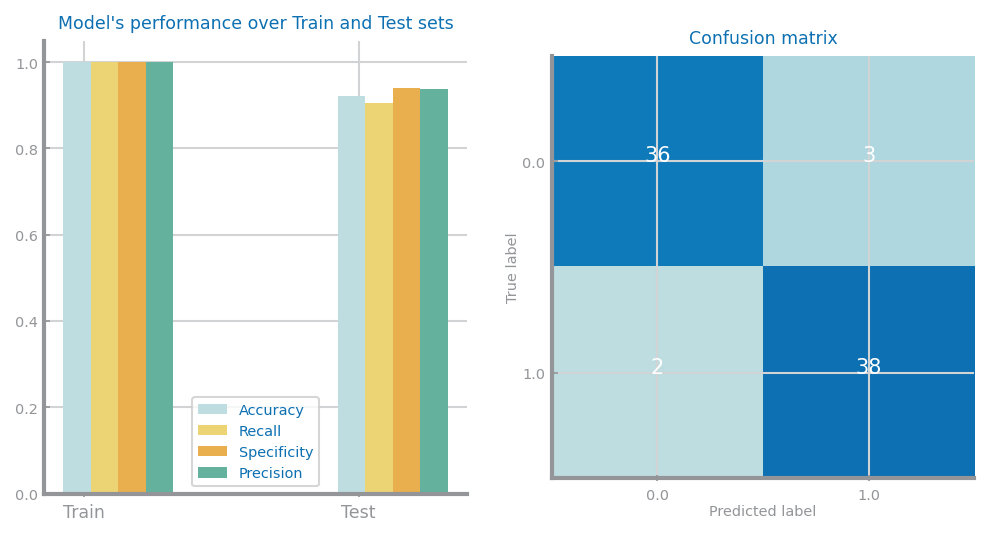


-> Average for 5-fold CrossVal for Heart:
CrossVal mean score: 0.9226851851851852
CrossVal std: 0.0166


In [6]:
from g20_Gradient_Boosting import crossValGB
GBoutput = crossValGB(X, y, labels, "Heart",output = True)

In [7]:
import shelve
with shelve.open("Heart") as db:
    db["GB"]=GBoutput

In [3]:
import shelve
GBoutput = None
with shelve.open("Heart") as db:
    GBoutput=db["GB"]


-> 5-fold CrossVal for Heart:
-> Fold 0 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 1 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 2 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 3 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25
-> Fold 4 for Heart:
--- done: deviance, 5
--- done: deviance, 10
--- done: deviance, 25
--- done: exponential, 5
--- done: exponential, 10
--- done: exponential, 25

Best parameters: ('deviance', 10, 1, 200, 0.5)


<Figure size 600x450 with 0 Axes>

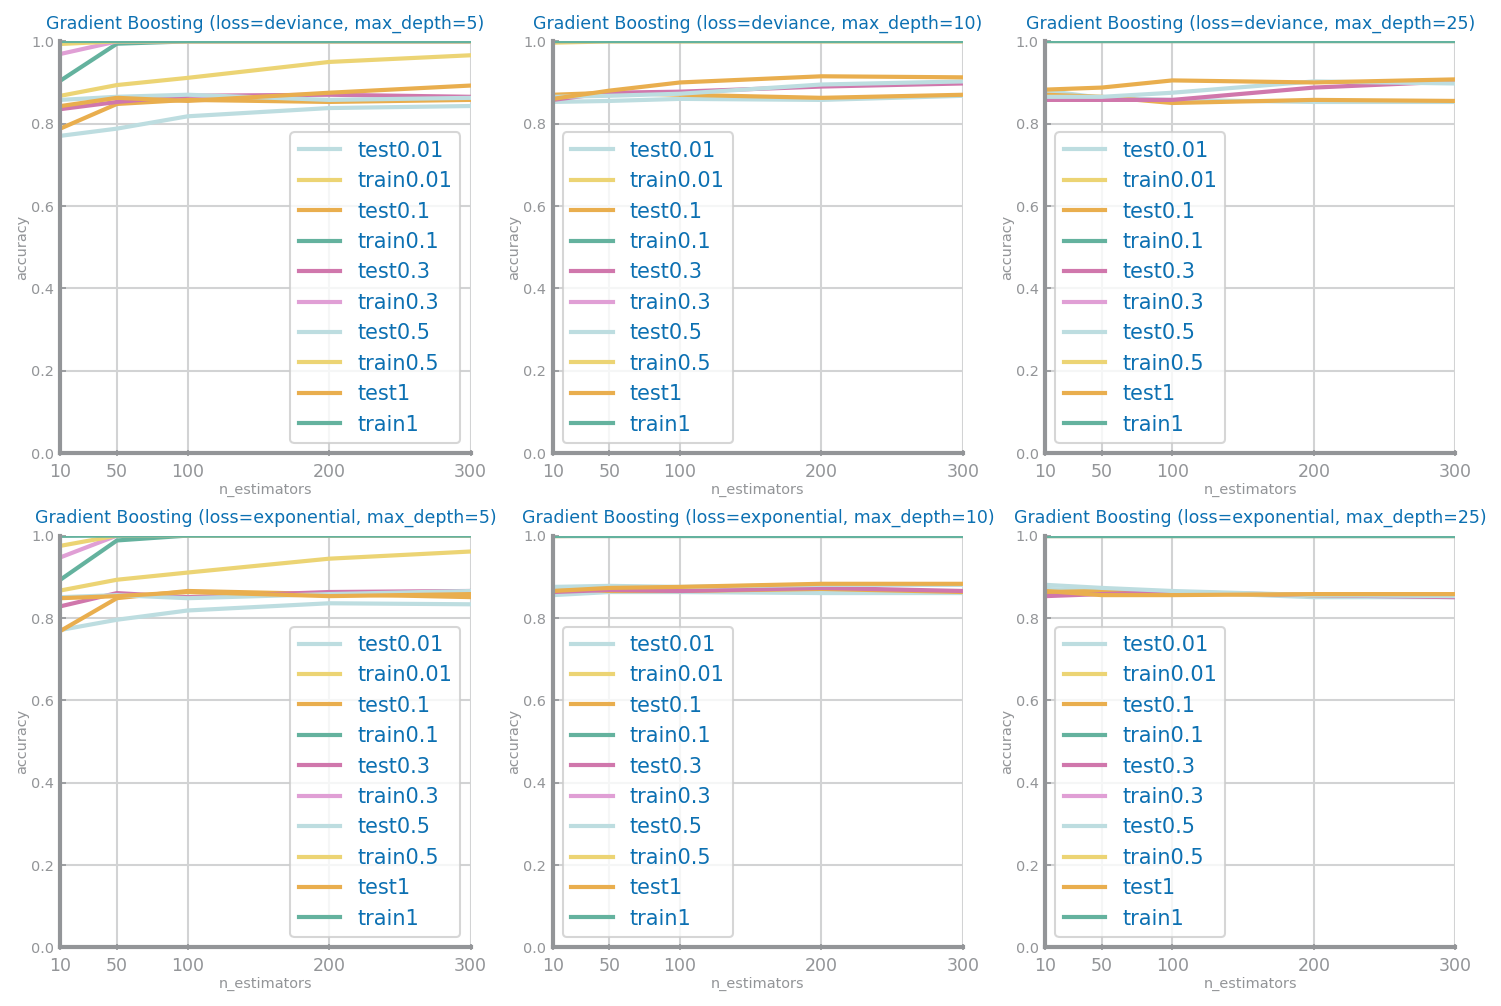

<Figure size 600x450 with 0 Axes>

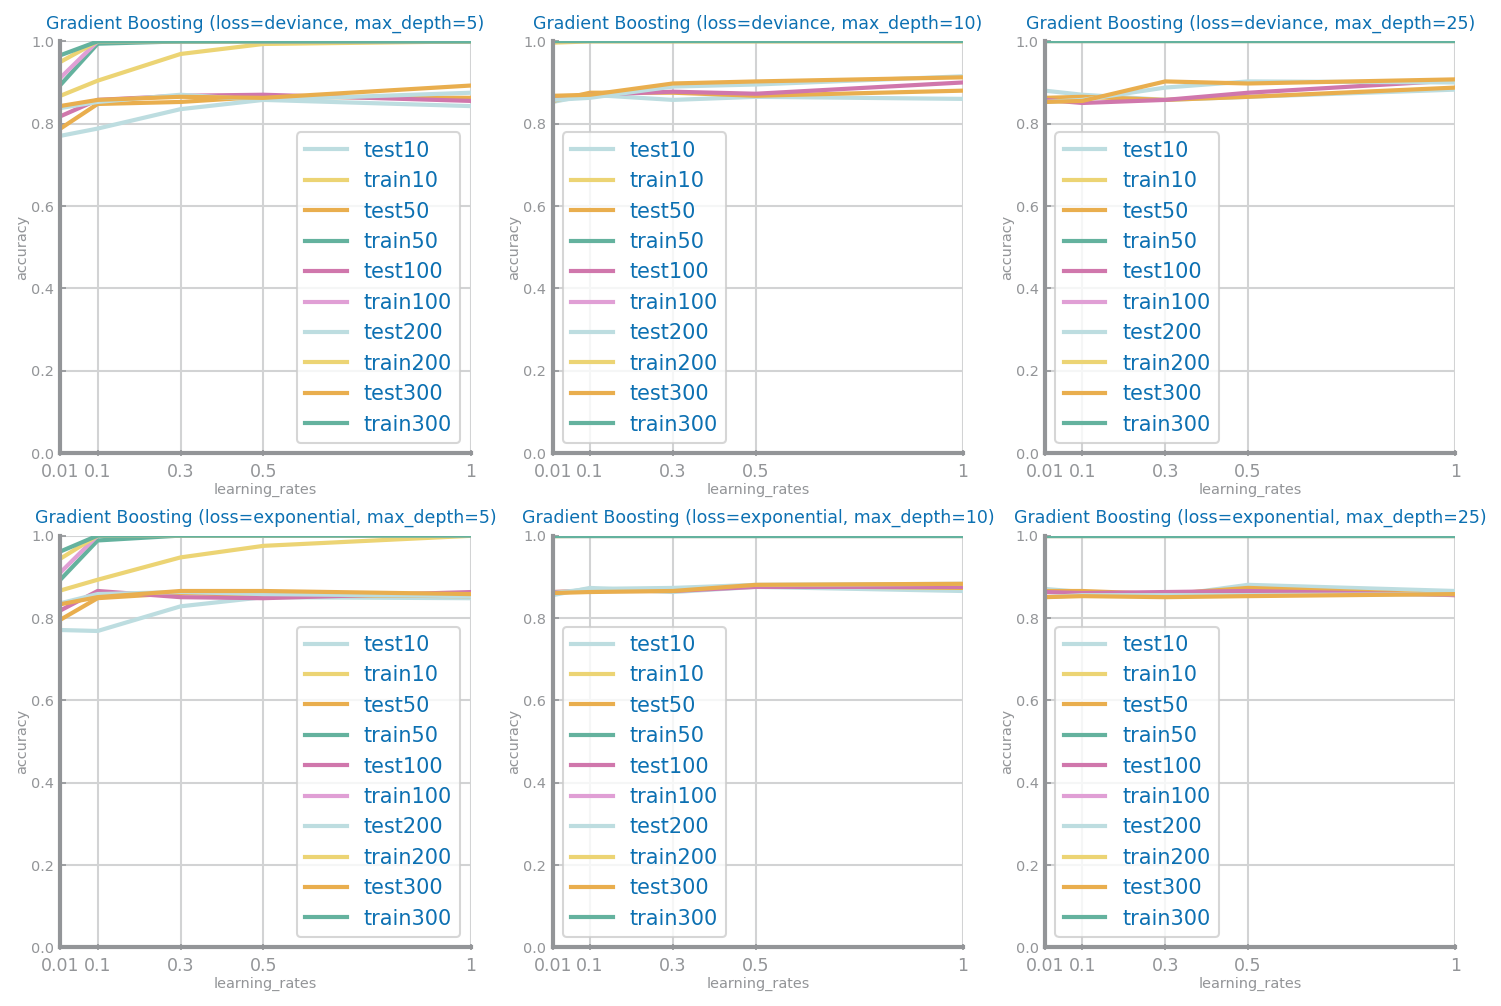

<Figure size 600x450 with 0 Axes>

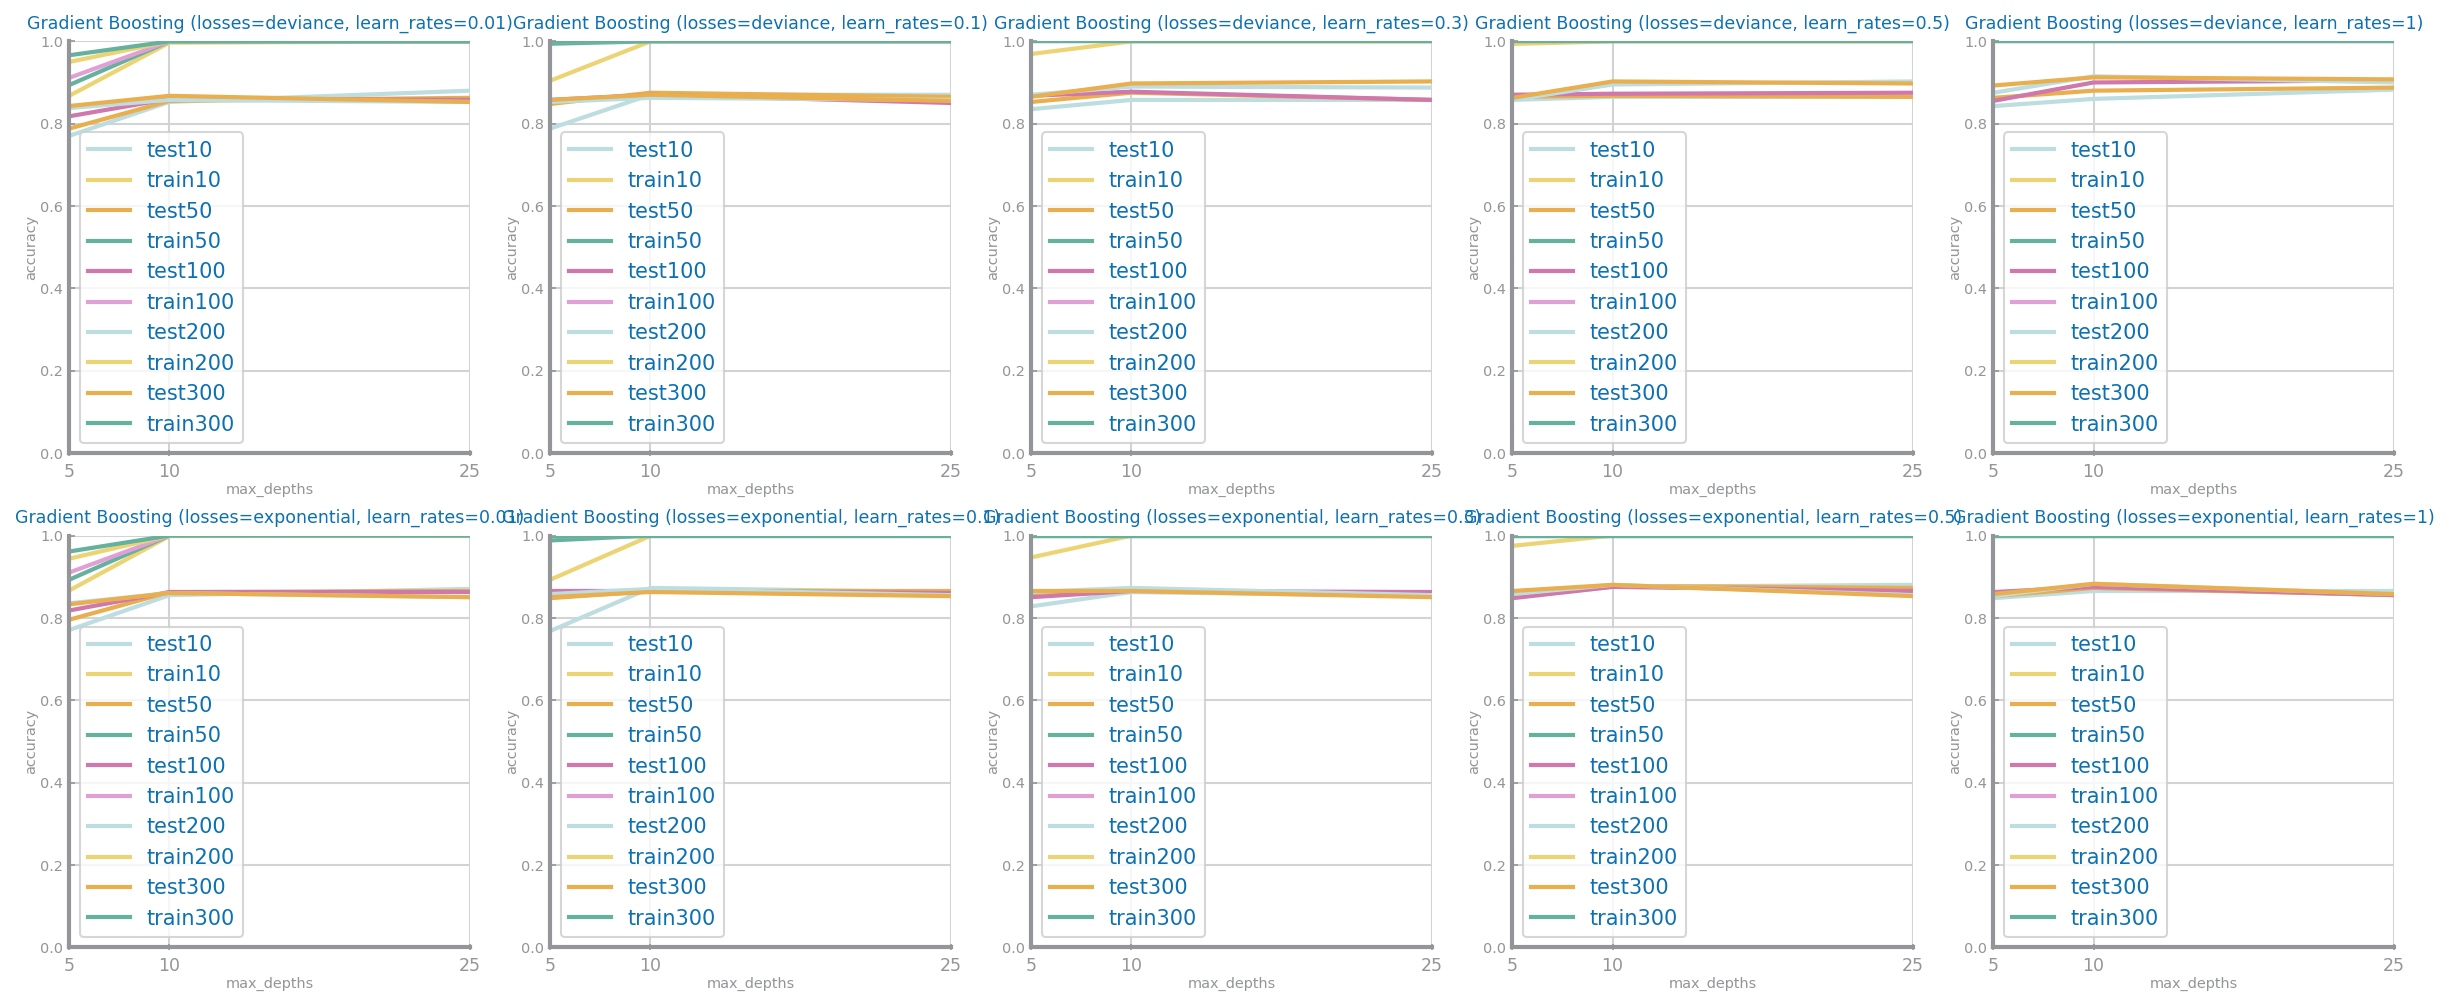

In [7]:

from g20_Gradient_Boosting import overfitting_cvGB
overfitting_cvGB(X, y, labels, "Heart")